# Data and Libraries Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import squarify  # For treemaps
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install missingno
import missingno as msno
from scipy import stats
import sklearn as sk

In [21]:
Prediction = pd.read_csv('BRFSS.csv')
Prediction.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [3]:
Prediction.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [4]:
Prediction.isnull().sum()#len(df_CVD)*100

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer
import pandas as pd

numerical_cols = Prediction.select_dtypes(include=['float64', 'int64']).columns

# Imputer for numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
Prediction[numerical_cols] = numerical_imputer.fit_transform(Prediction[numerical_cols])


In [4]:
# Imputer for categorical columns
categorical_cols = Prediction.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='constant', fill_value='missing')
Prediction[categorical_cols] = categorical_imputer.fit_transform(Prediction[categorical_cols])


In [5]:
Prediction.duplicated().sum()

80

In [6]:
duplicateObser = Prediction[Prediction.duplicated()]
LabelsDupObser=duplicateObser.axes[0].tolist()
print('Number of duplicated observations:', duplicateObser.shape[0])
Prediction=Prediction.drop_duplicates()
print(Prediction.shape)

Number of duplicated observations: 80
(308774, 19)


# EXPLORATORY ANALYSIS

In [8]:
Prediction.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [7]:
Prediction.describe().style.background_gradient(cmap = "Accent")

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000,308774.000000
mean,170.615220,83.590399,28.626813,5.097557,29.834290,15.109517,6.297237
std,10.658452,21.344664,6.522810,8.200434,24.877812,14.926912,8.583837
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [8]:
def summary_statistics(data):

    summary = []

    for column in Prediction.columns:
        unique_values = Prediction[column].nunique()
        total_values = len(Prediction[column])
        summary.append([column, unique_values, total_values, (unique_values/total_values)*100])
    summary_Prediction = pd.DataFrame(summary, columns=['Column', 'Unique Values', 'Total Values', 'Percentage (%)'])
    return summary_Prediction


summary_statistics(Prediction)

,Column,Unique Values,Total Values,Percentage (%)
0,General_Health,5,308774,0.001619
1,Checkup,5,308774,0.001619
2,Exercise,2,308774,0.000648
3,Heart_Disease,2,308774,0.000648
4,Skin_Cancer,2,308774,0.000648
5,Other_Cancer,2,308774,0.000648
6,Depression,2,308774,0.000648
7,Diabetes,4,308774,0.001295
8,Arthritis,2,308774,0.000648
9,Sex,2,308774,0.000648


# Distribution of the Target Variable (Heart Disease)

<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

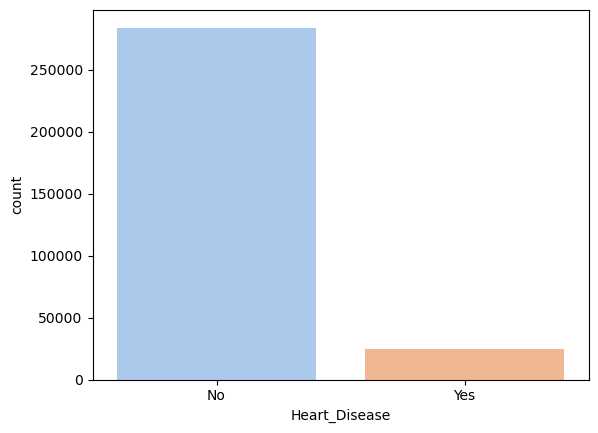

In [9]:
sns.countplot(x='Heart_Disease',data=Prediction,palette='pastel')

In [10]:
class_counts = Prediction['Heart_Disease'].value_counts()
print(class_counts)

# Calculate the percentage of each class
class_counts_percentage = (class_counts / len(Prediction)) * 100
print(class_counts_percentage)


No     283803
Yes     24971
Name: Heart_Disease, dtype: int64
No     91.912855
Yes     8.087145
Name: Heart_Disease, dtype: float64


## Count of Males and Females with Heart Disease

In [11]:
Prediction.Sex[Prediction['Heart_Disease']=='Yes'].value_counts()

Male      15073
Female     9898
Name: Sex, dtype: int64

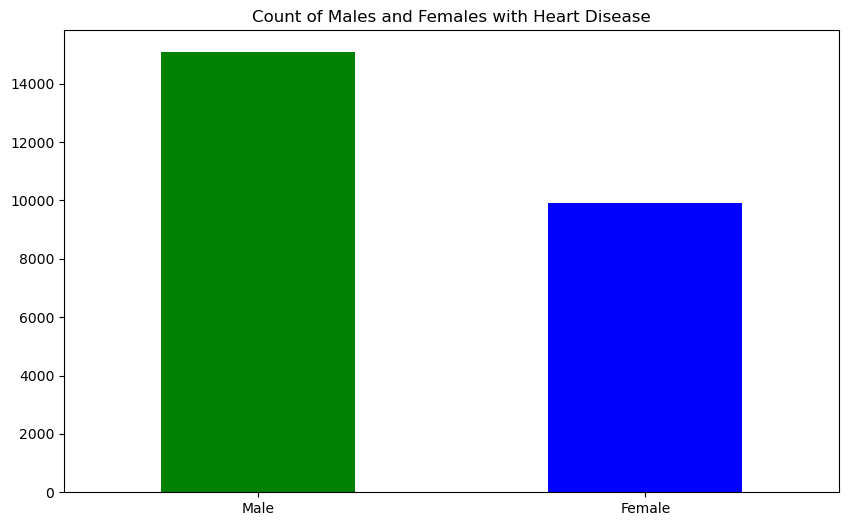

In [16]:
Prediction.Sex[Prediction['Heart_Disease']=='Yes'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of Males and Females with Heart Disease")
plt.xticks(rotation=0);

In [12]:
pd.crosstab(Prediction.Heart_Disease,Prediction.Sex)

Sex,Female,Male
Heart_Disease,,
No,150257,133546
Yes,9898,15073


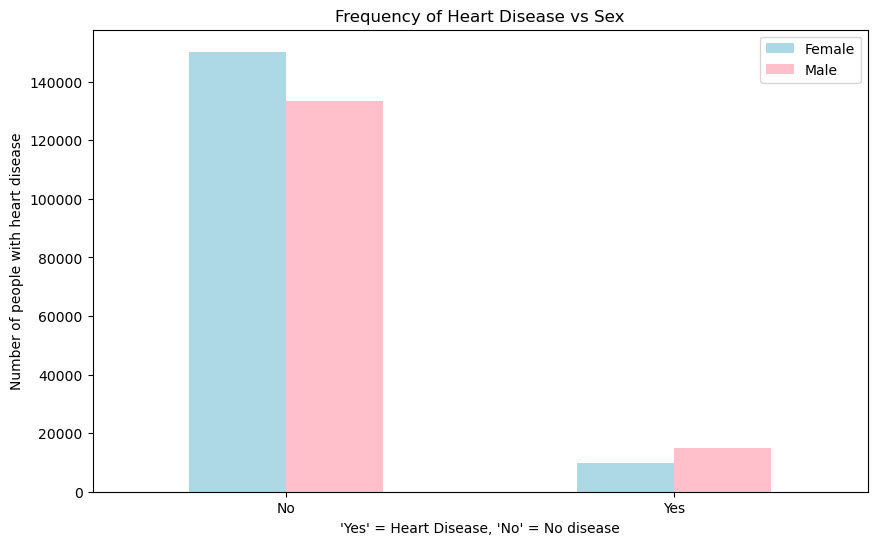

In [13]:
# Crosstab and plot
pd.crosstab(Prediction['Heart_Disease'], Prediction['Sex']).plot(kind='bar', figsize=(10, 6), color=["lightblue", "pink"])

# Labeling and customization
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("'Yes' = Heart Disease, 'No' = No disease")
plt.ylabel("Number of people with heart disease")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [14]:
for column_name in Prediction.columns:
    unique_values = len(Prediction[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'General_Health' has '5' unique values
Feature 'Checkup' has '5' unique values
Feature 'Exercise' has '2' unique values
Feature 'Heart_Disease' has '2' unique values
Feature 'Skin_Cancer' has '2' unique values
Feature 'Other_Cancer' has '2' unique values
Feature 'Depression' has '2' unique values
Feature 'Diabetes' has '4' unique values
Feature 'Arthritis' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'Age_Category' has '13' unique values
Feature 'Height_(cm)' has '99' unique values
Feature 'Weight_(kg)' has '525' unique values
Feature 'BMI' has '3654' unique values
Feature 'Smoking_History' has '2' unique values
Feature 'Alcohol_Consumption' has '31' unique values
Feature 'Fruit_Consumption' has '77' unique values
Feature 'Green_Vegetables_Consumption' has '75' unique values
Feature 'FriedPotato_Consumption' has '69' unique values


In [15]:
Prediction.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [23]:
numeric_features=['BMI', 'Height_(cm)', 'Weight_(kg)',  'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
categorical_features=['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Smoking_History',
       'Age_Category']

# Univariate Analysis

## Frequency Analysis for Categorical Variables

C:\Users\user\AppData\Local\Temp\ipykernel_18744\1149507751.py:11: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


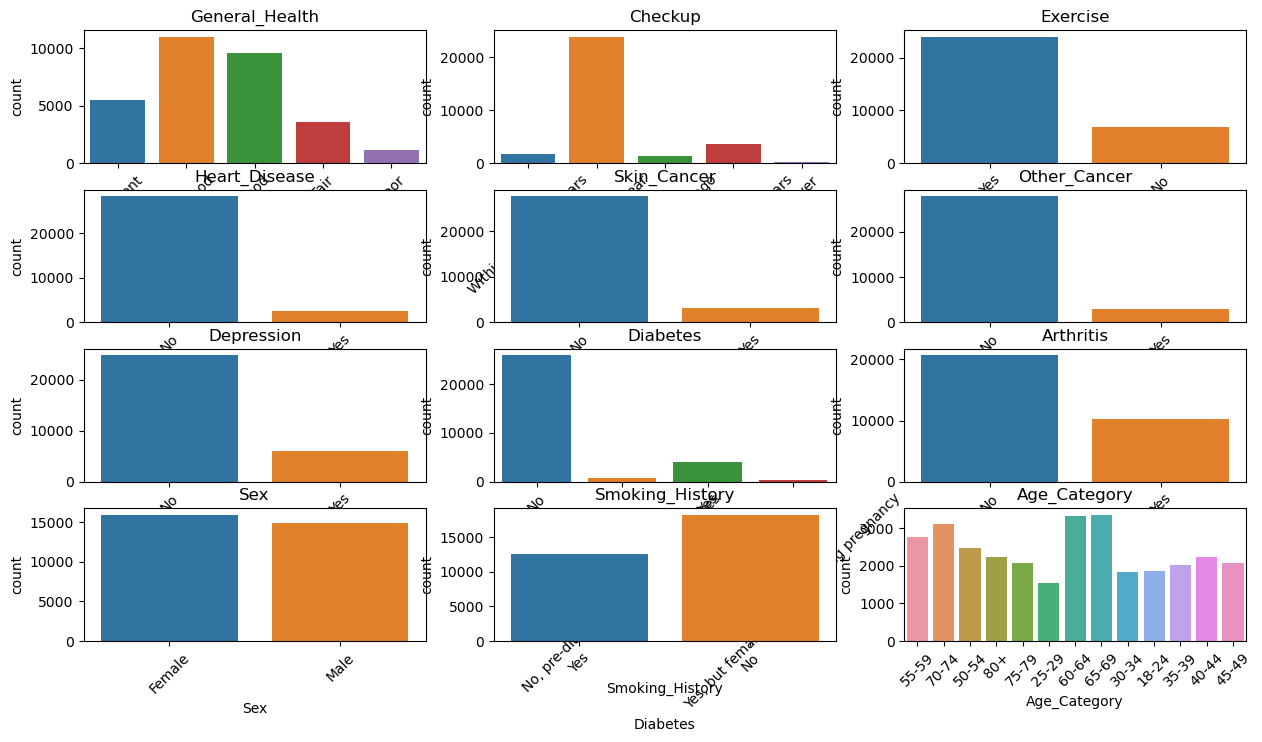

In [17]:
# Sample the dataset for efficient plotting
Prediction_data = Prediction.sample(frac=0.1, random_state=42)

# Plotting bar charts for categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features) // 3 + 1, 3, i + 1)
    sns.countplot(x=col, data=Prediction_data) 
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

## Distribution Analysis for Numerical Variables

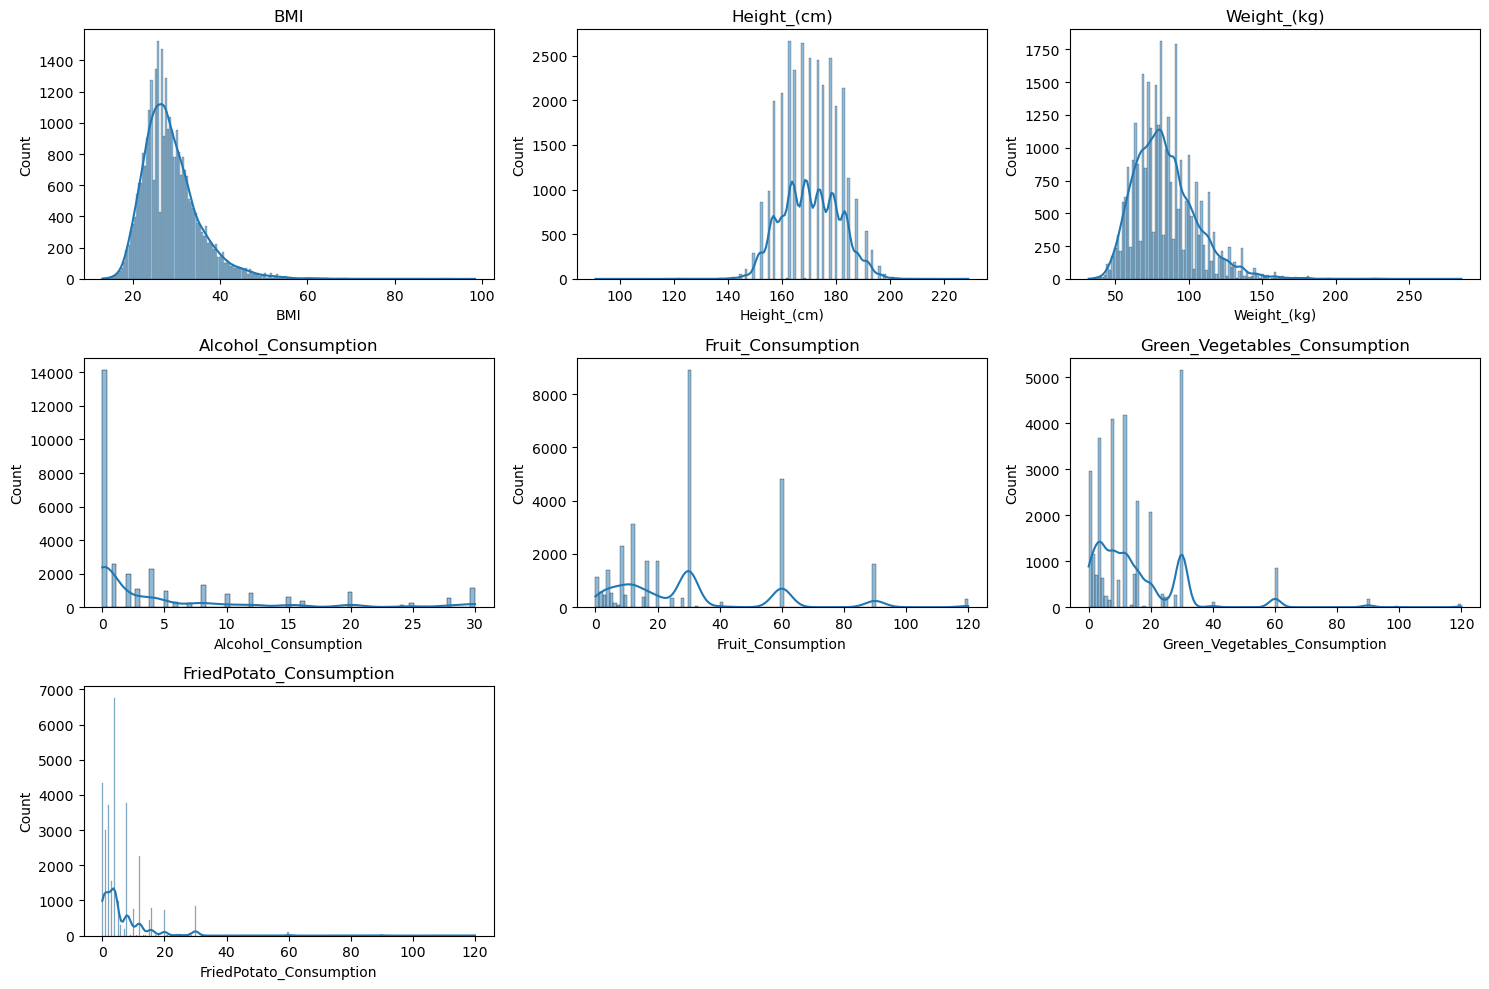

In [23]:
# Plotting histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(len(numeric_features) // 3 + 1, 3, i + 1)
    sns.histplot(Prediction_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

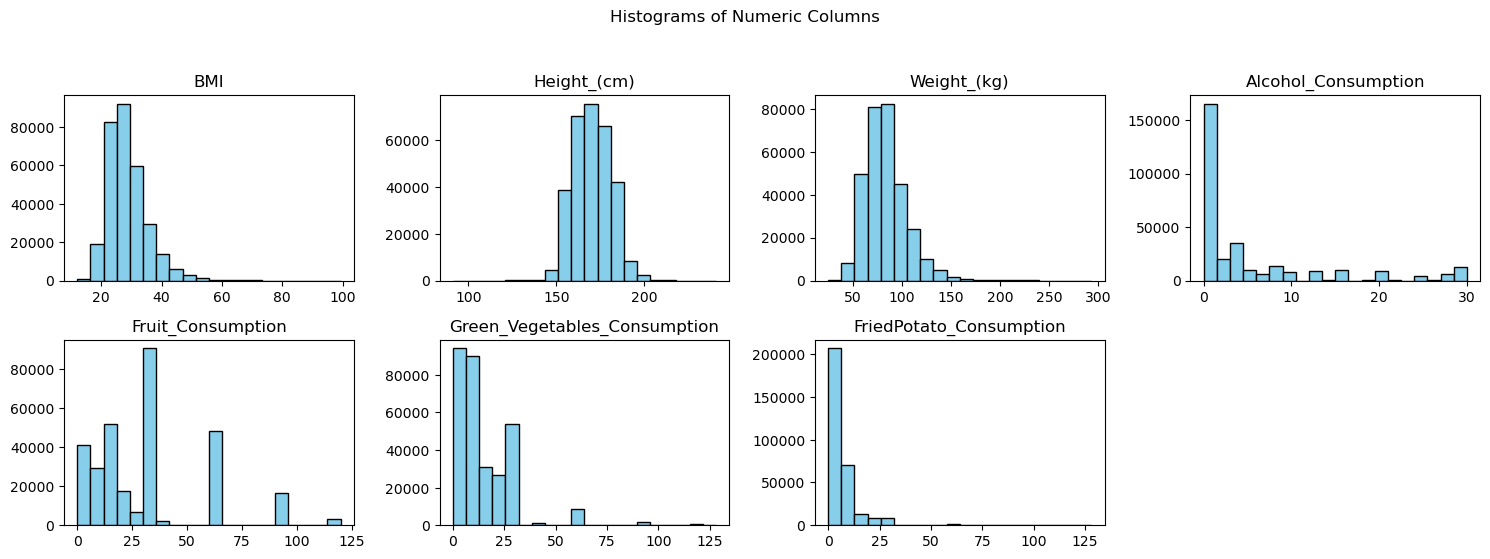

In [18]:
# Plot histograms for numeric columns
import matplotlib.pyplot as plt

# Assuming numeric_features is a list of numeric columns from your DataFrame
# Replace this with your actual list of numeric columns

plt.figure(figsize=(15, 10))

# Iterate over each numeric column and plot a histogram
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(Prediction[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(feature)

plt.suptitle("Histograms of Numeric Columns", y=1.02)
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Visualizing Continuous Columns (Prediction dataset)')

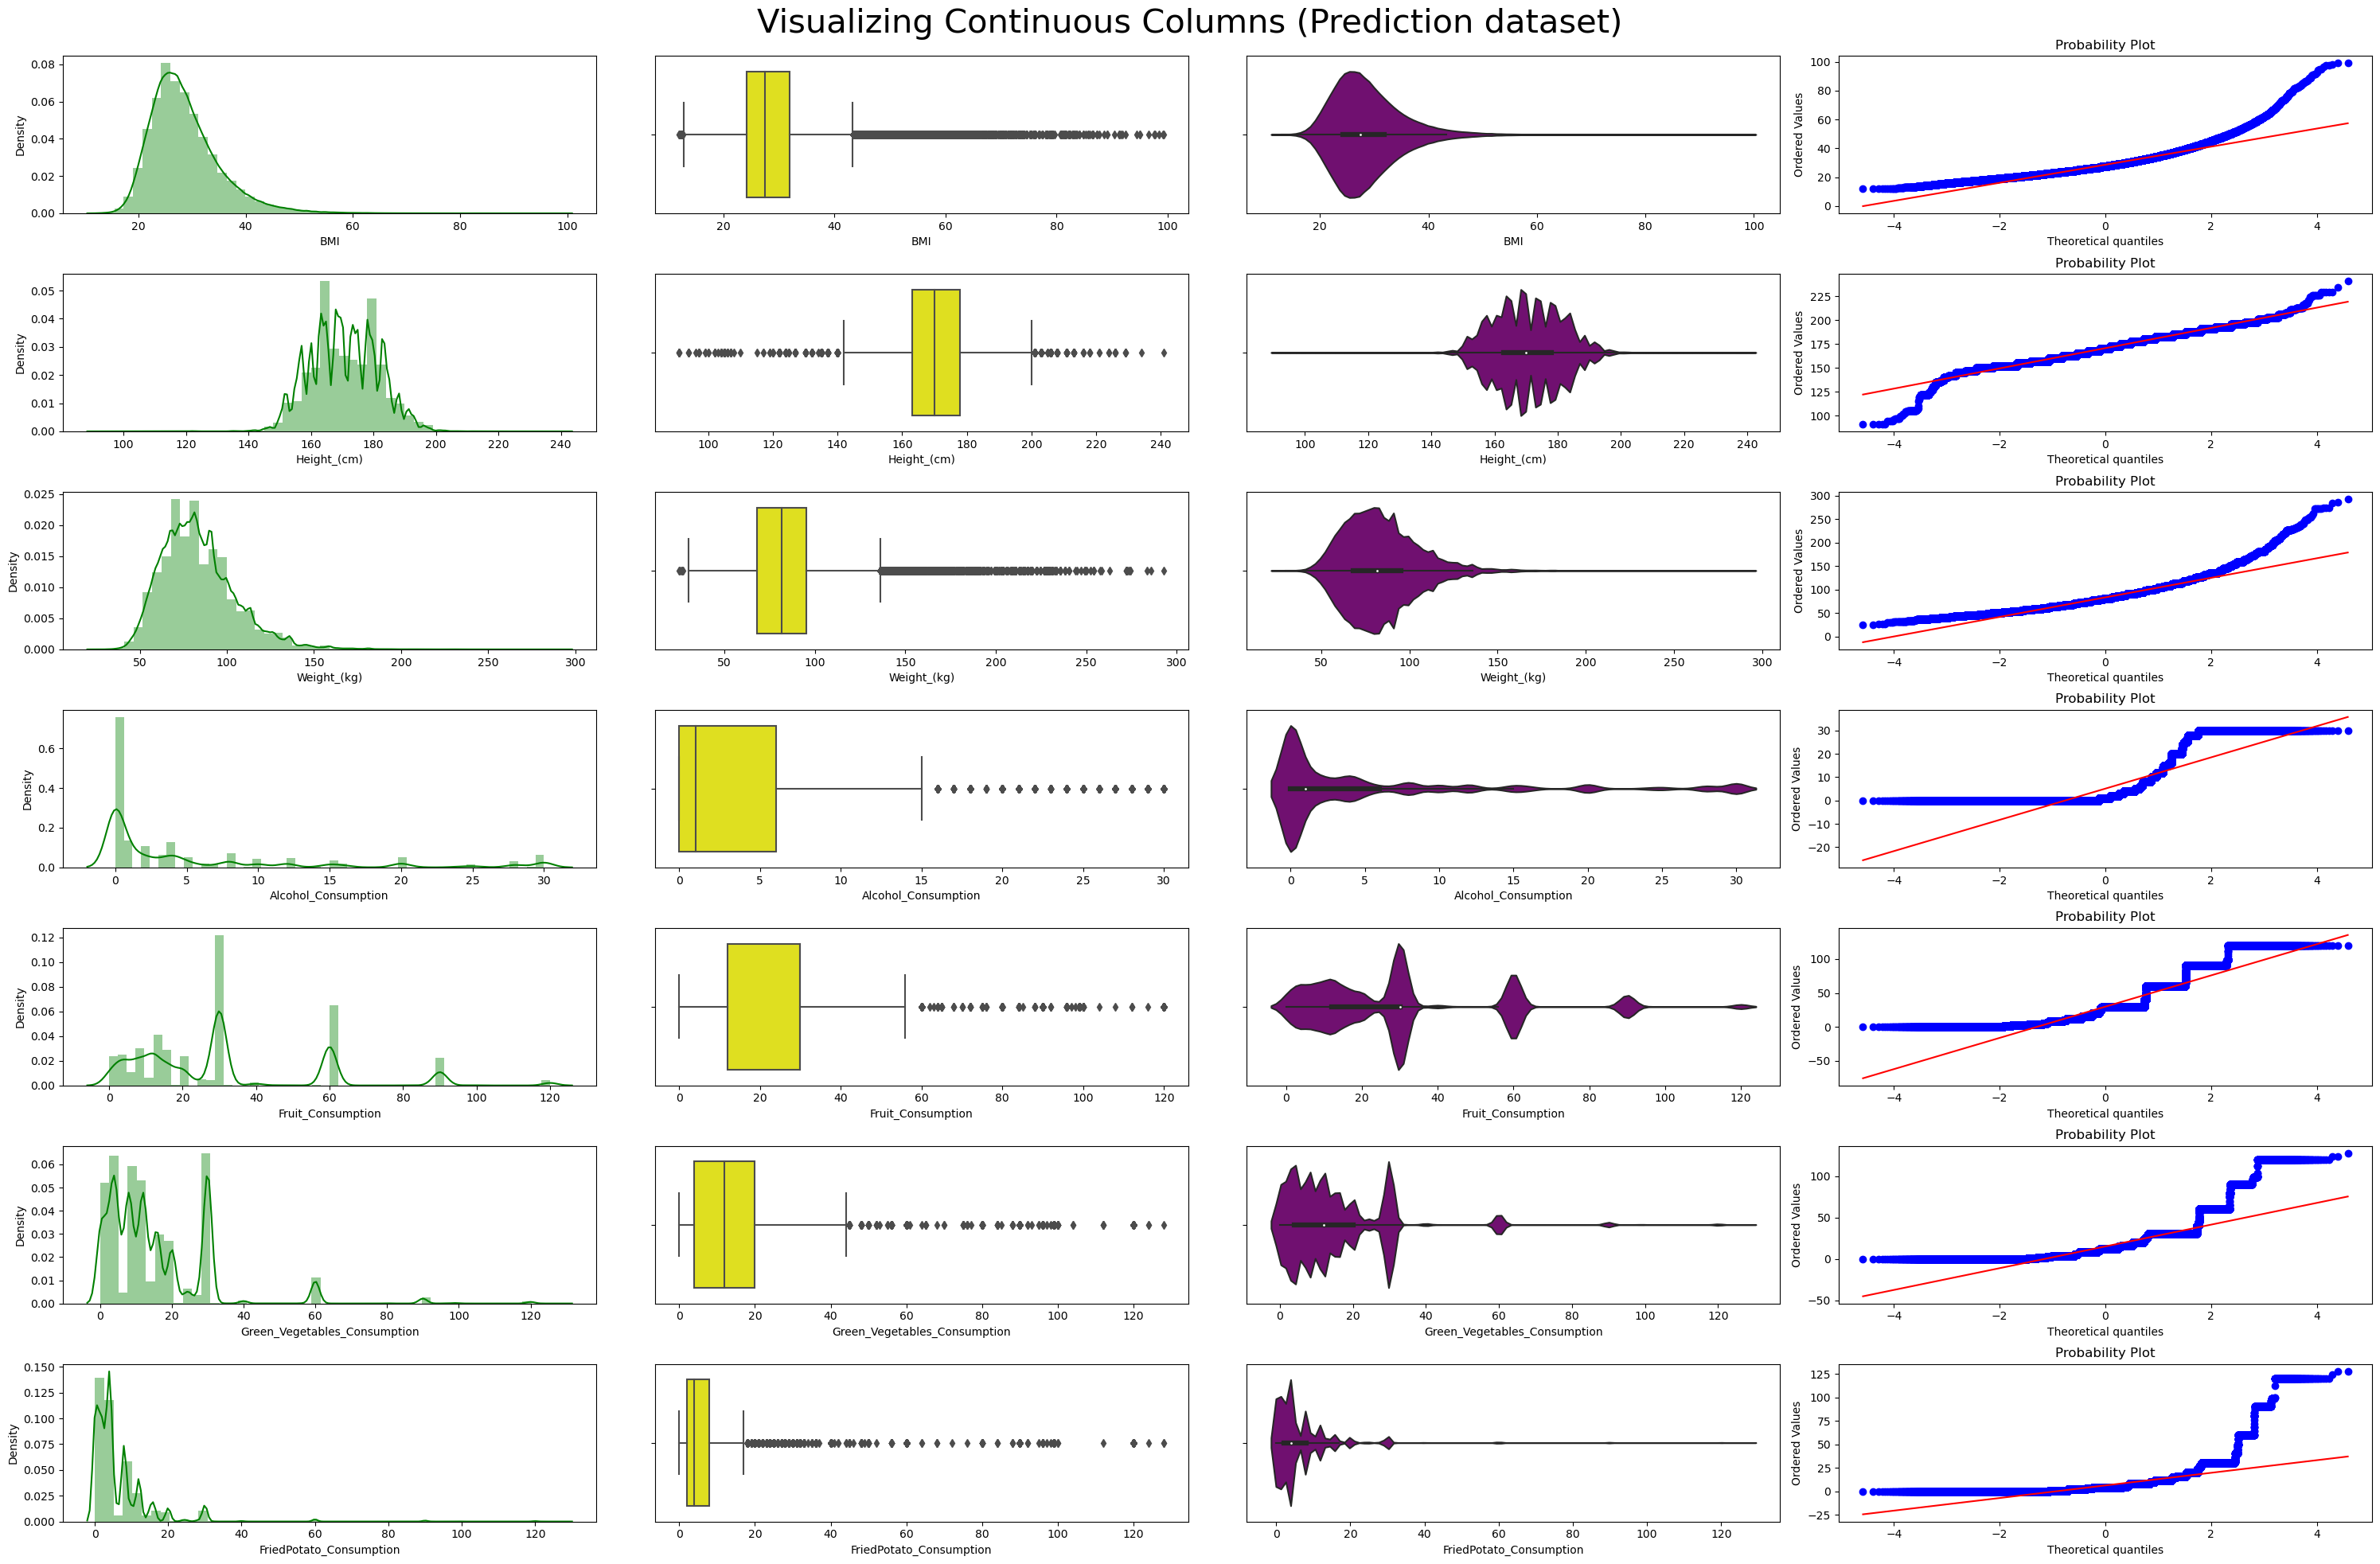

In [19]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(Prediction[i],ax=ax[index,0],color='green')
    sns.boxplot(Prediction[i],ax=ax[index,1],color='yellow')
    sns.violinplot(Prediction[i],ax=ax[index,2],color='purple')
    stats.probplot(Prediction[i],plot=ax[index,3])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns (Prediction dataset)",fontsize=30)

In [24]:
# Calculate Z-scores for numerical columns
z_scores = stats.zscore(Prediction[numeric_features])

# Set a threshold for considering a data point as an outlier (e.g., Z-score > 3)
threshold = 3

# Create a boolean mask indicating whether each element of the array is an outlier
outlier_mask = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to show only rows with outliers
outliers_Prediction = Prediction[outlier_mask]

# Display the rows with outliers
print("Rows with outliers:")
print(outliers_Prediction)

Rows with outliers:
Empty DataFrame
Columns: [General_Health, Checkup, Exercise, Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Diabetes, Arthritis, Sex, Age_Category, Height_(cm), Weight_(kg), BMI, Smoking_History, Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption, FriedPotato_Consumption]
Index: []


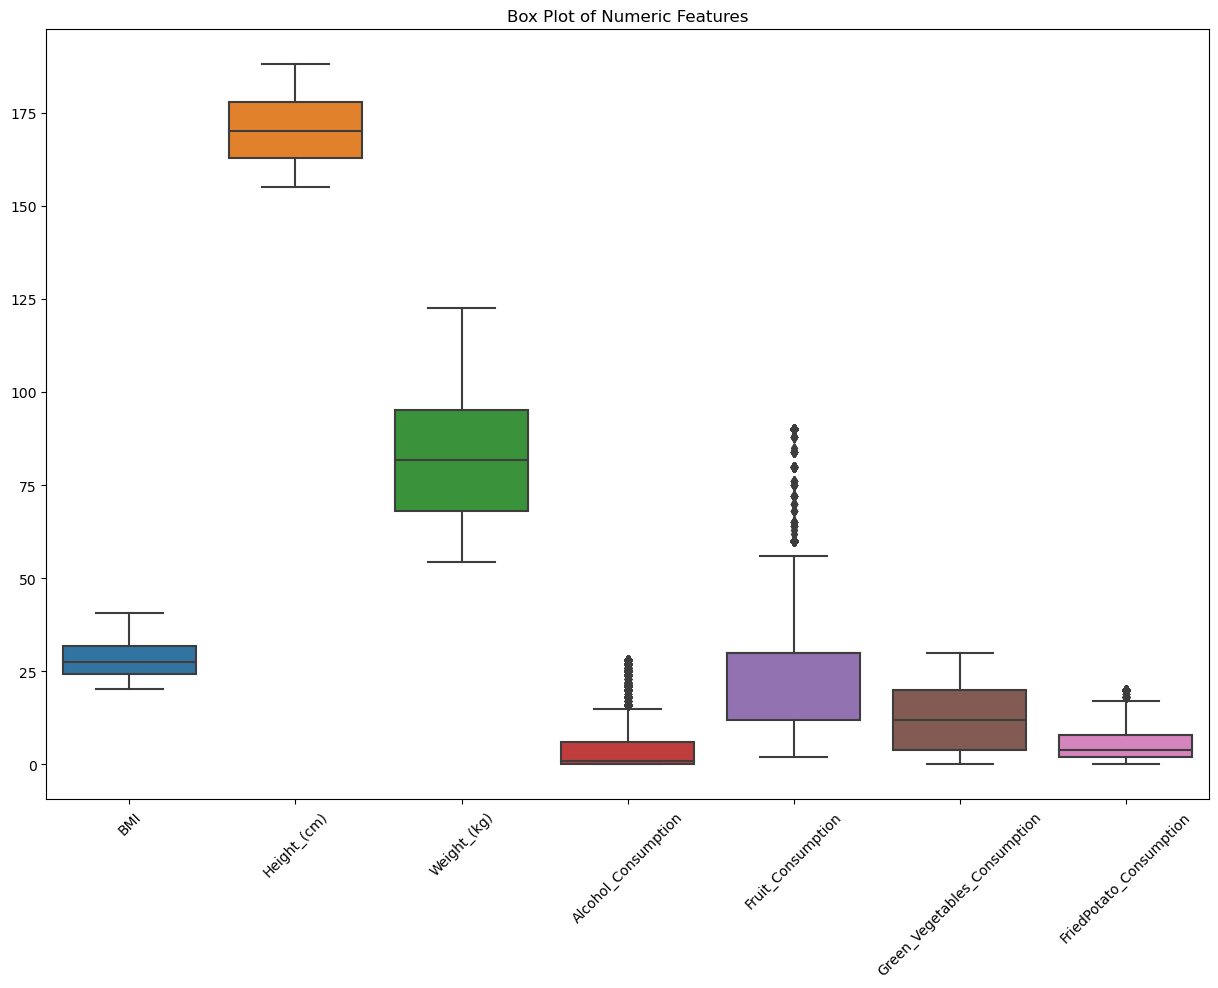

In [25]:
# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=Prediction[numeric_features])
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

### Wincorization

In [22]:
from scipy.stats.mstats import winsorize

columns_to_winsorize = ['BMI', 'Height_(cm)', 'Weight_(kg)', 
                        'Alcohol_Consumption', 'Fruit_Consumption', 
                        'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

# Apply winsorization to the 5th and 95th percentiles for each column
for column in columns_to_winsorize:
    Prediction[column] = winsorize(Prediction[column], limits=[0.05, 0.05])

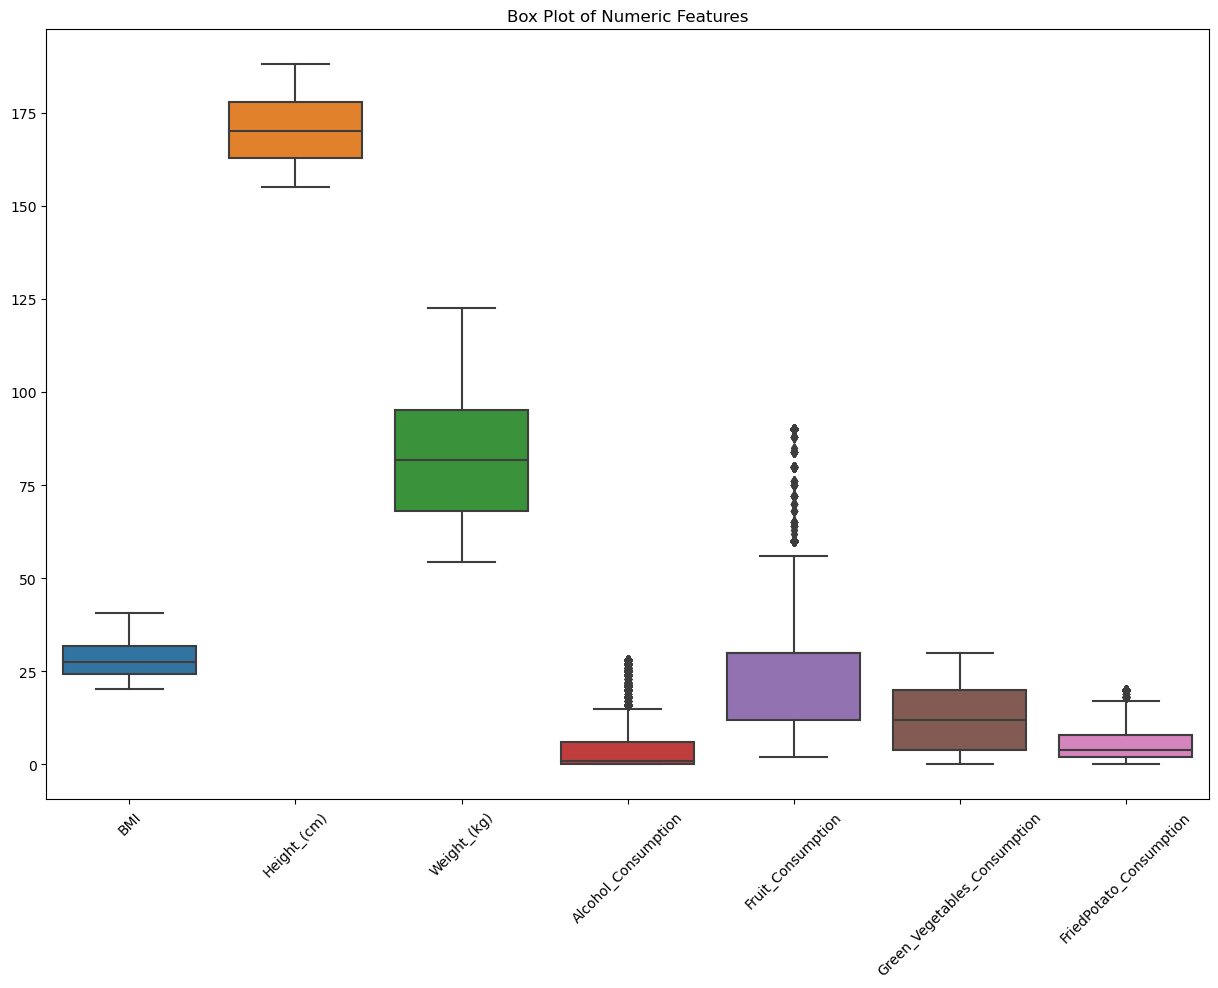

In [23]:
# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=Prediction[numeric_features])
plt.title("Box Plot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

# Bivariate Analysis

## Numerical-Numerical Variables

<Figure size 1200x800 with 0 Axes>

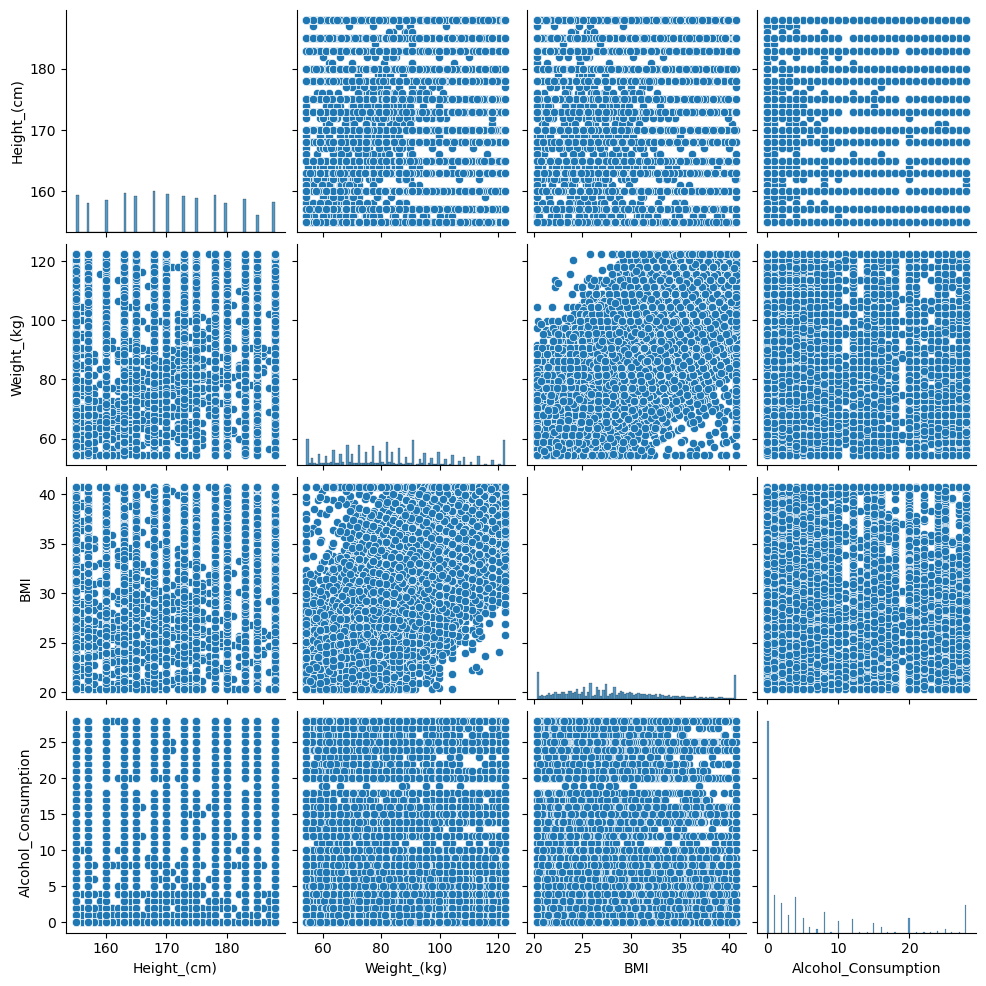

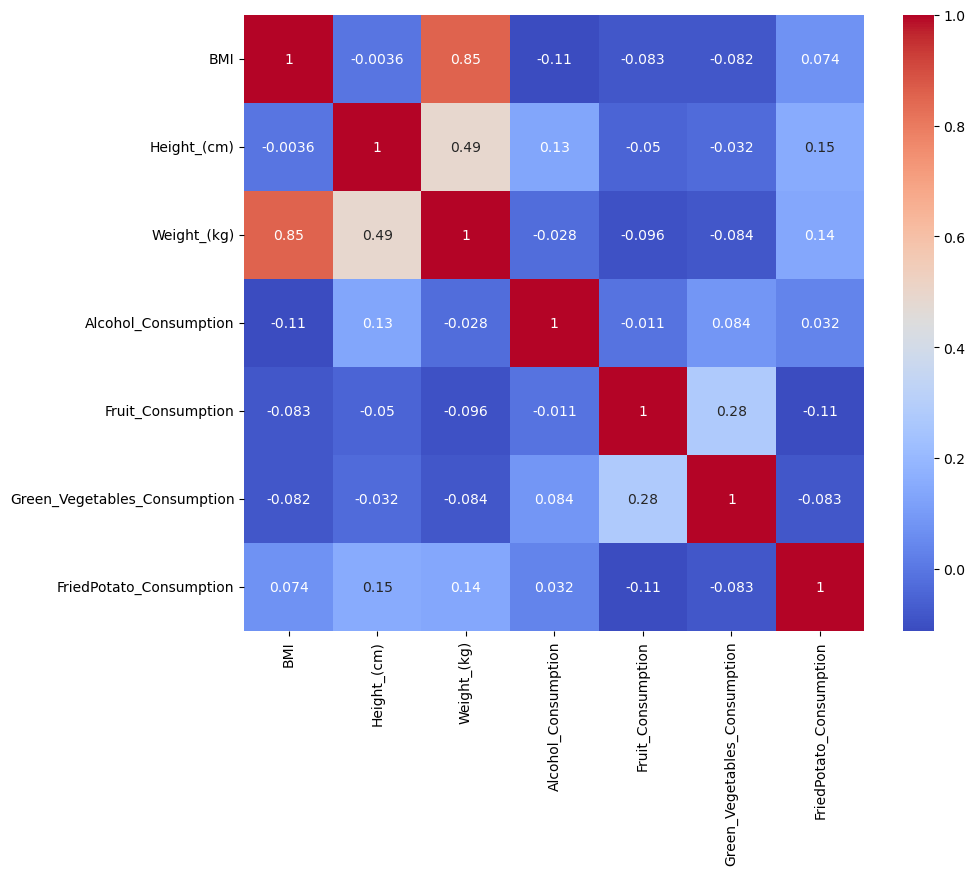

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot
plt.figure(figsize=(12, 8))
sns.pairplot(Prediction, vars=['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption'])
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = Prediction[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Categorical-Numerical Analysis

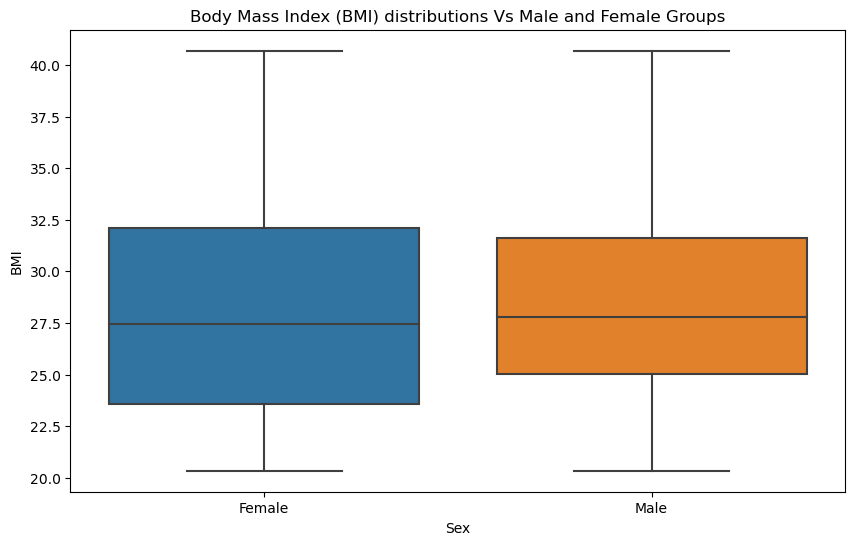

In [31]:
# Box plots for categorical variables against a numerical variable
import seaborn as sns
import matplotlib.pyplot as plt

sampled_data = Prediction.sample(frac=0.1, random_state=42)

# Boxplot example: 'Sex' against 'BMI'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='BMI', data=sampled_data)
plt.title("Body Mass Index (BMI) distributions Vs Male and Female Groups")
plt.show()

## Categorical-Categorical Analysis

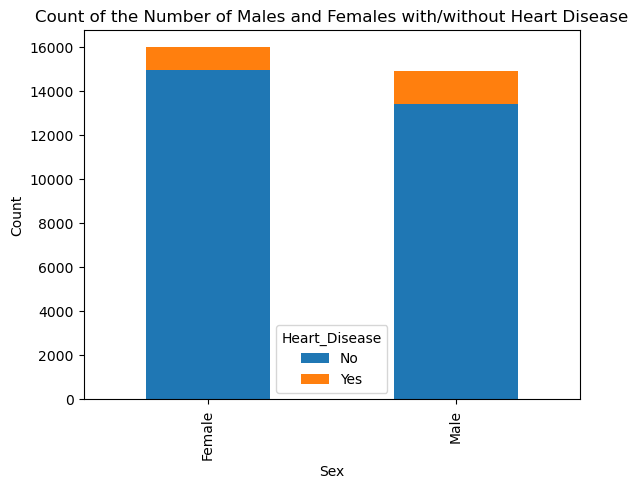

In [32]:
# Cross-tabulation and stacked bar chart
#'Sex' and 'Heart_Disease'
cross_tab = pd.crosstab(sampled_data['Sex'], sampled_data['Heart_Disease'])
cross_tab.plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title("Count of the Number of Males and Females with/without Heart Disease")
plt.show()

## Distribution of the Number of People with Heart Disease from Various Factors

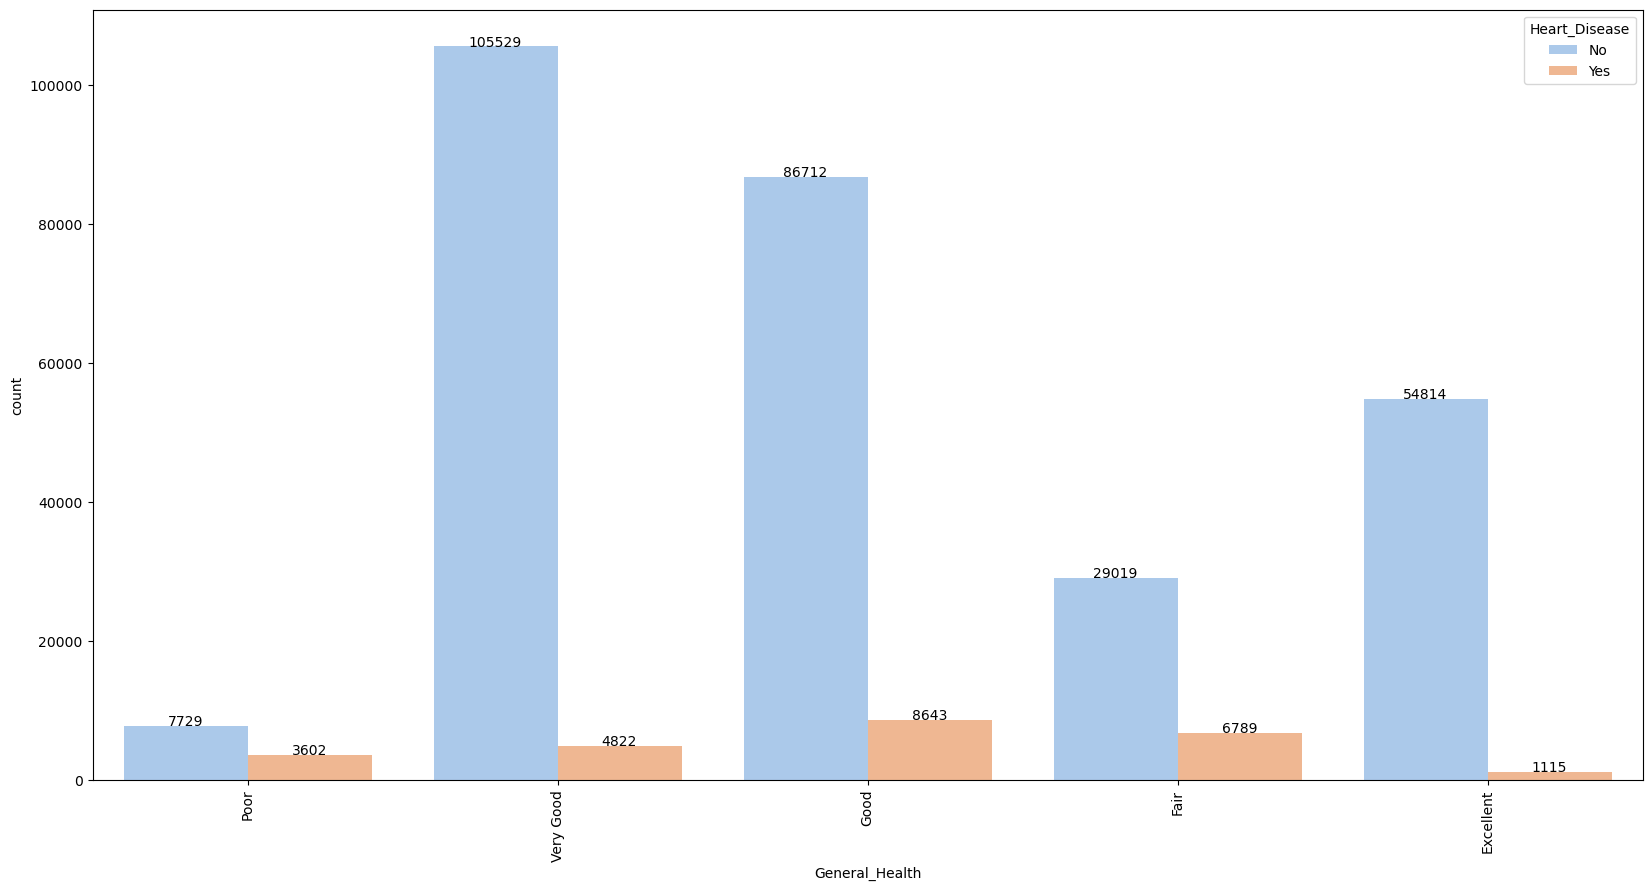

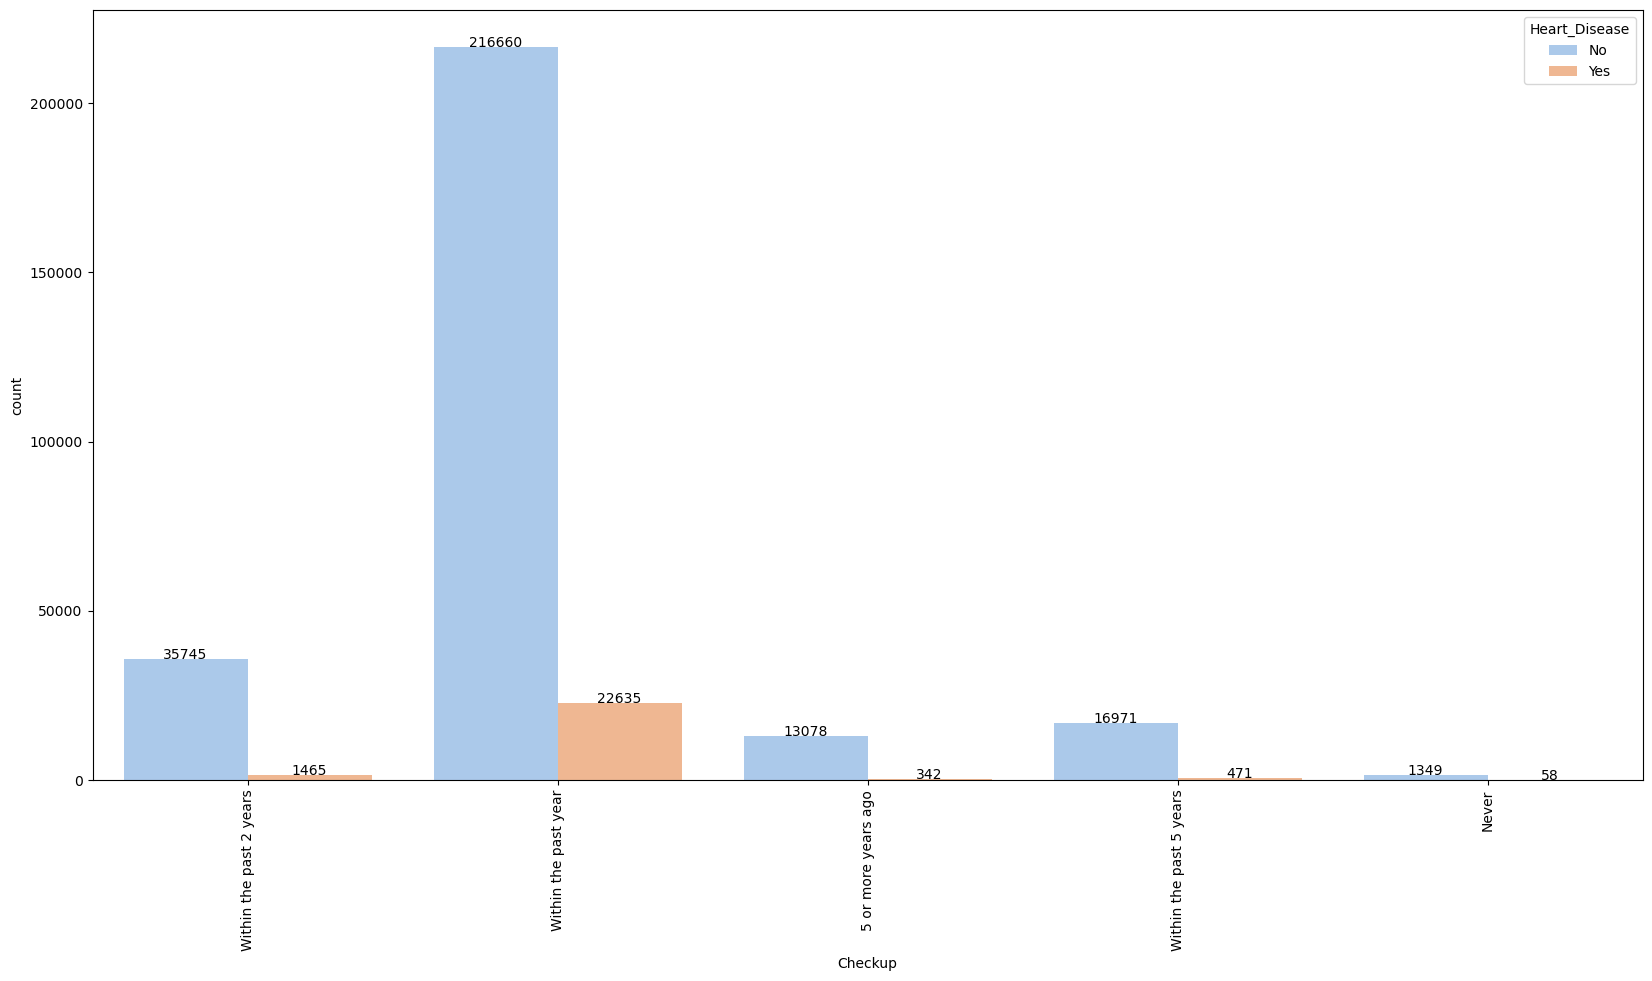

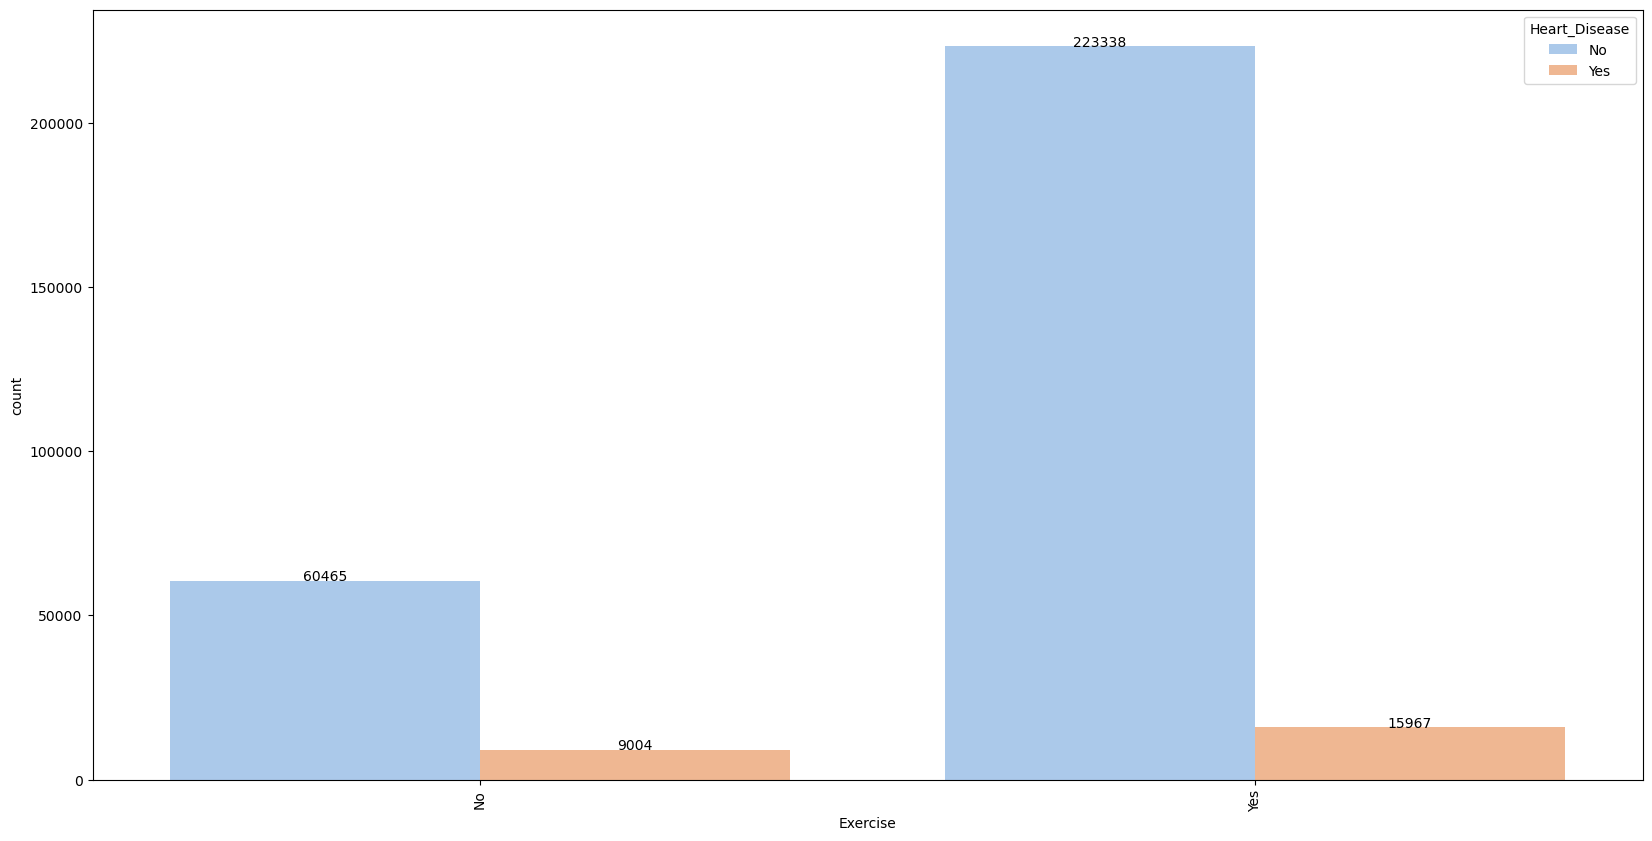

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


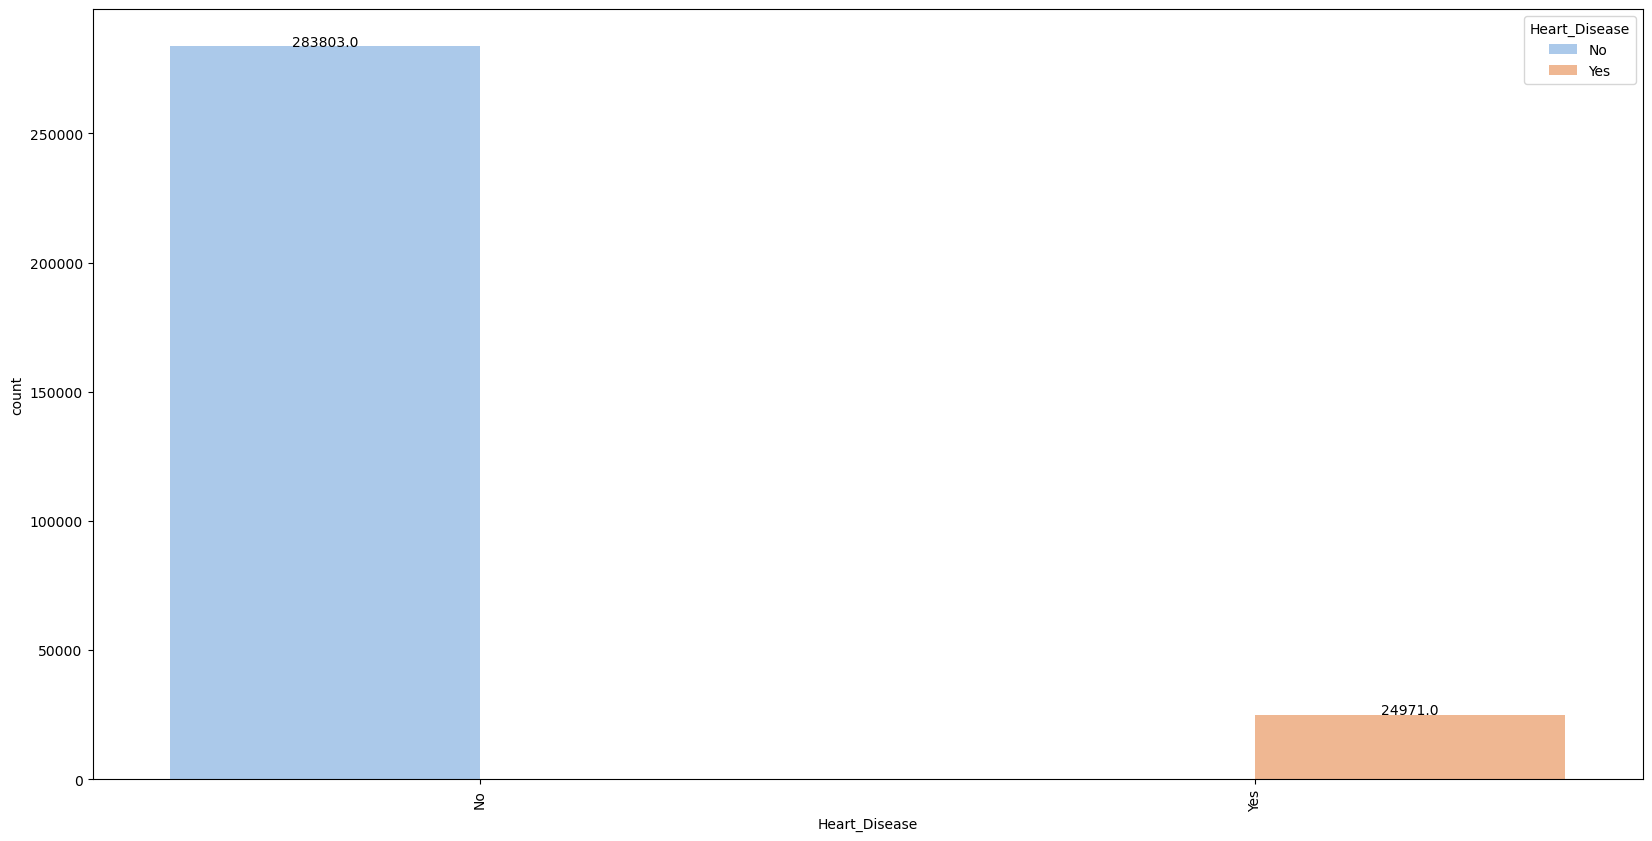

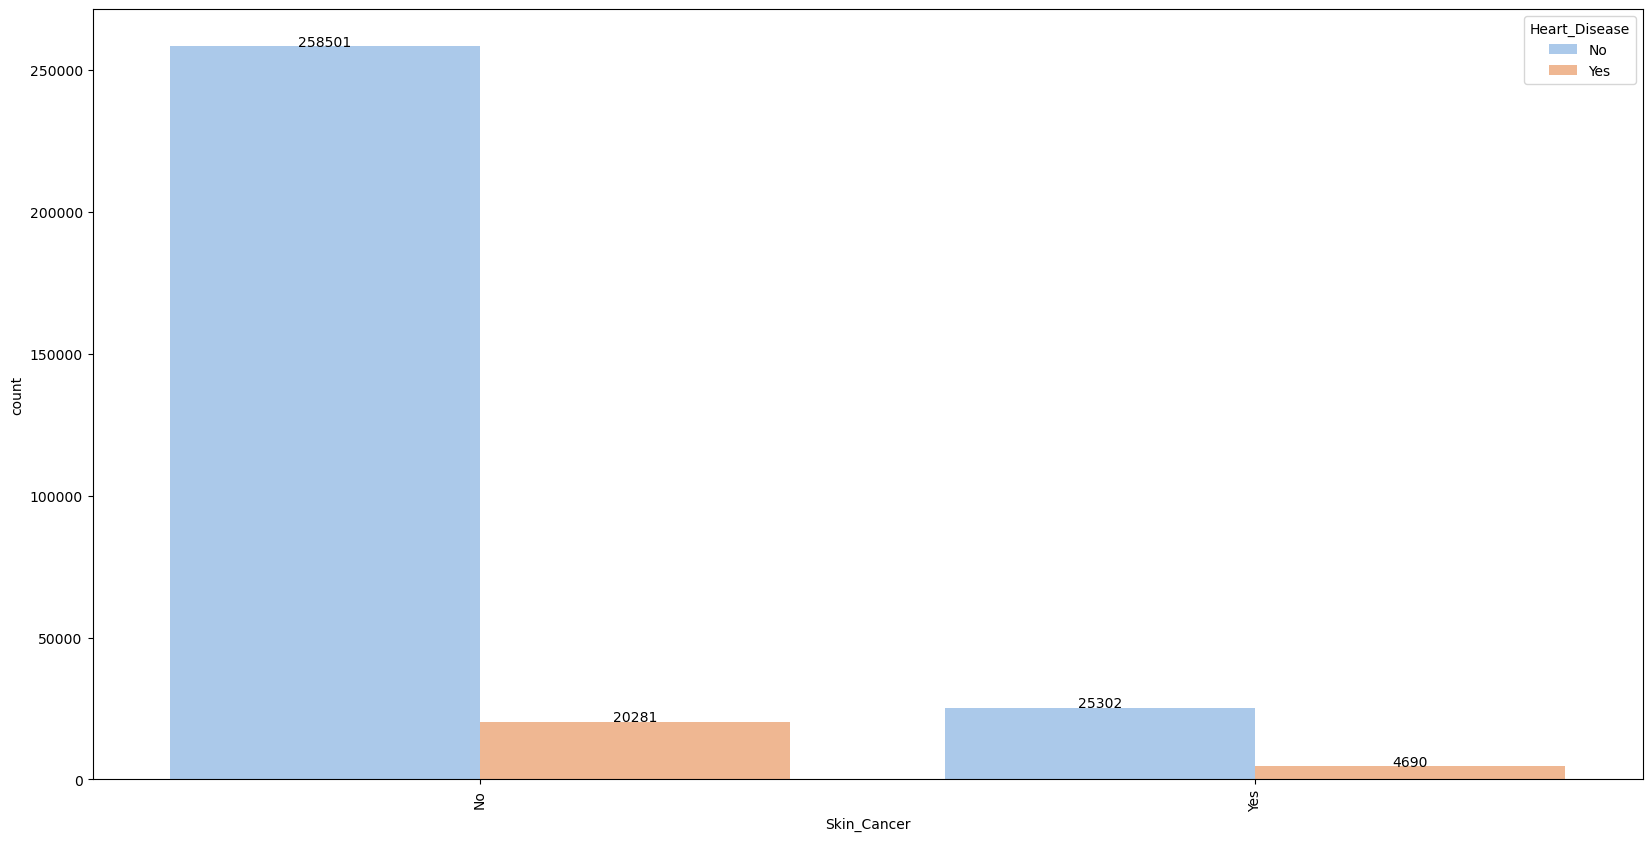

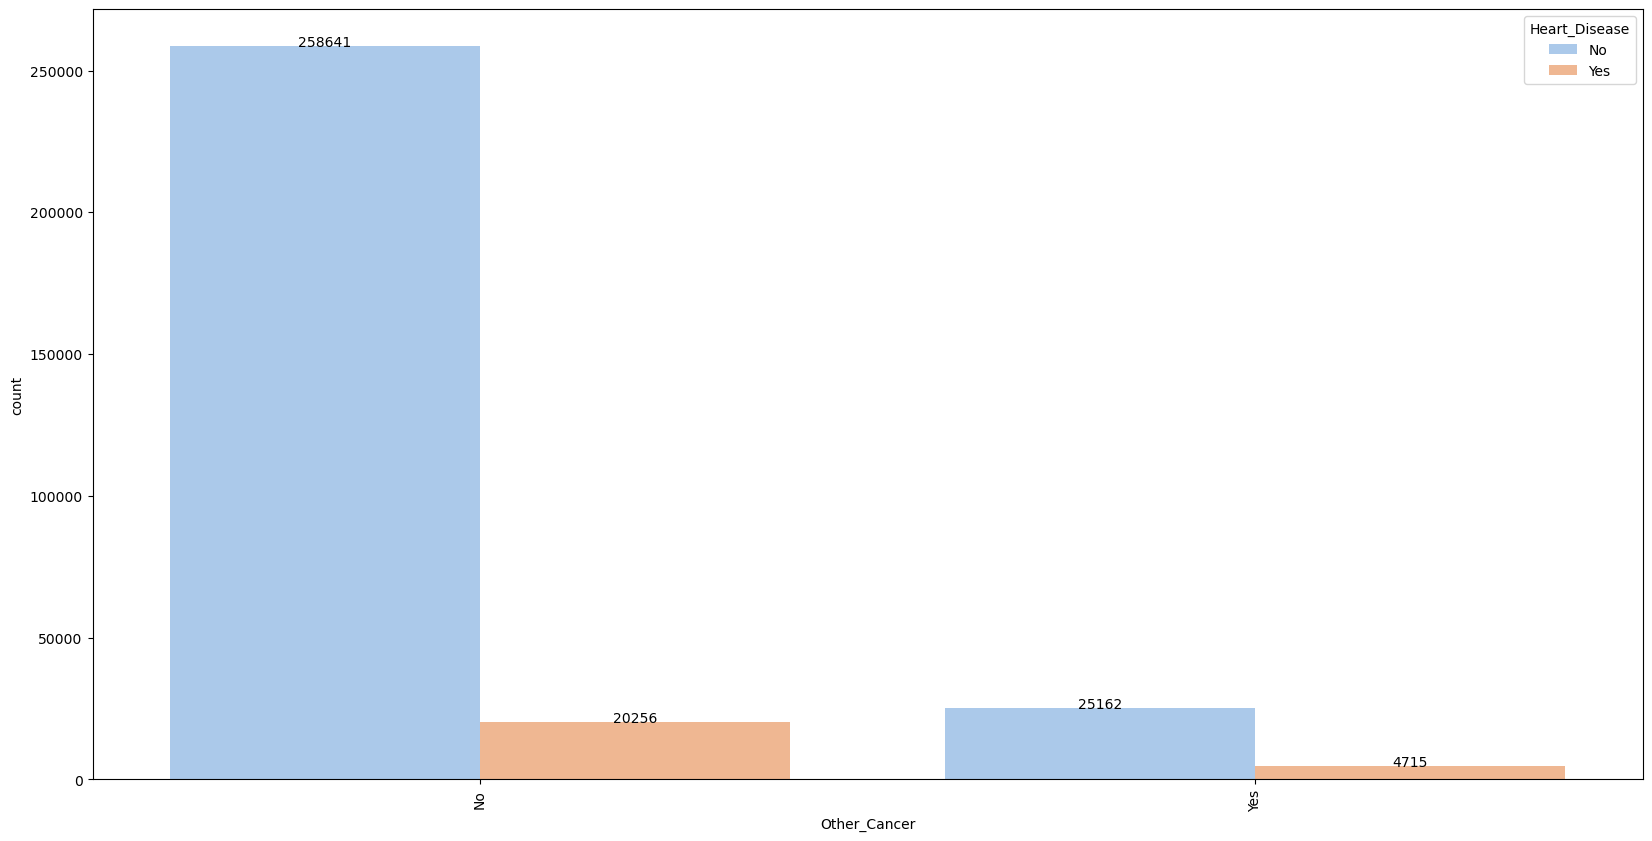

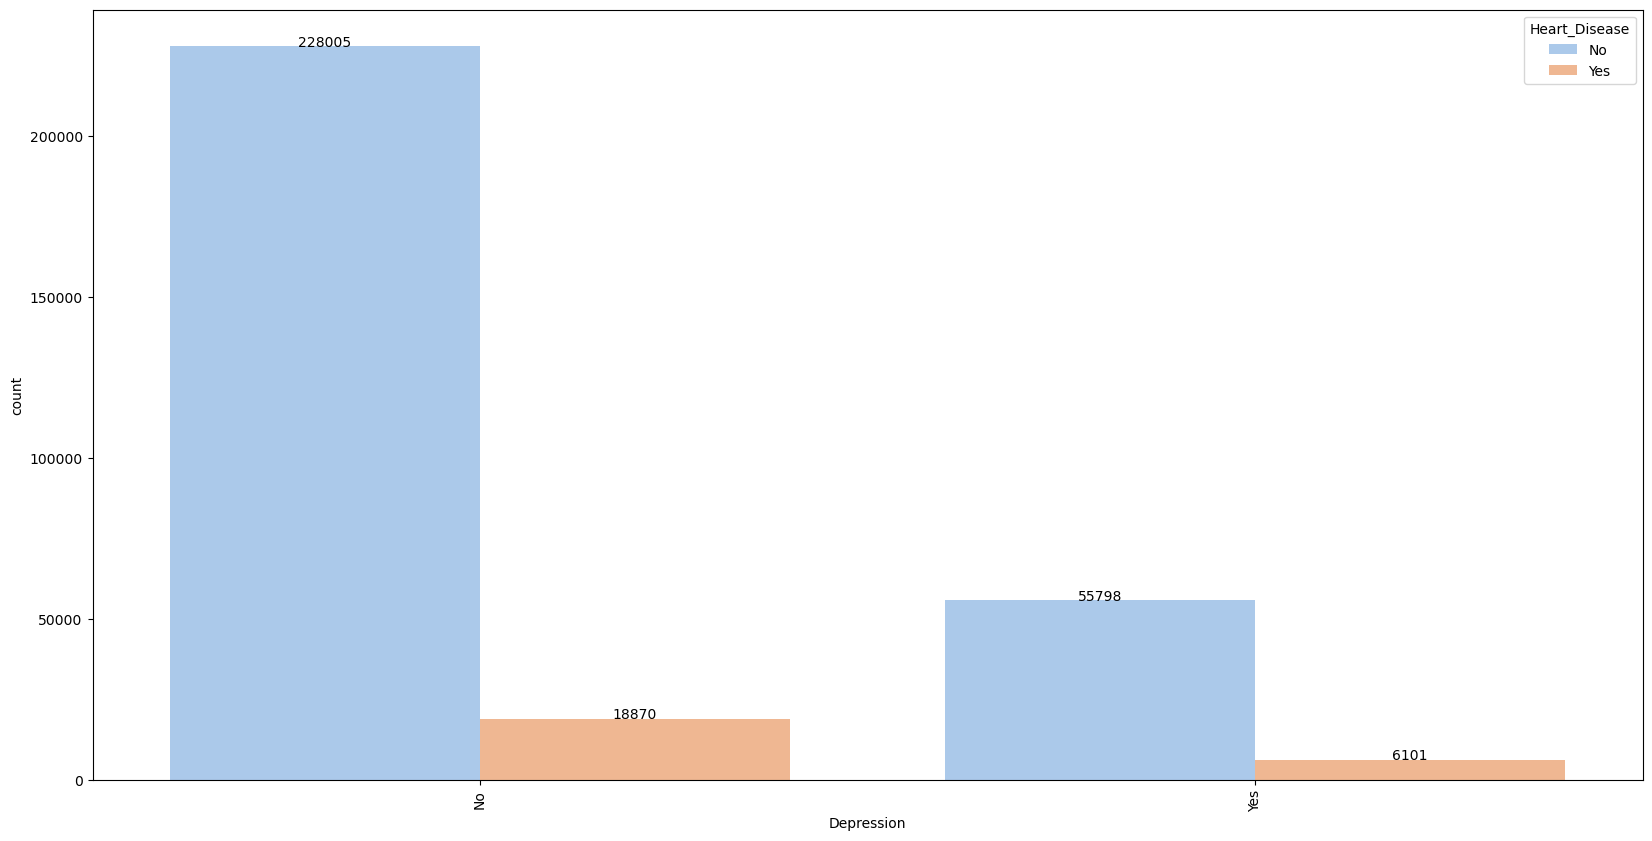

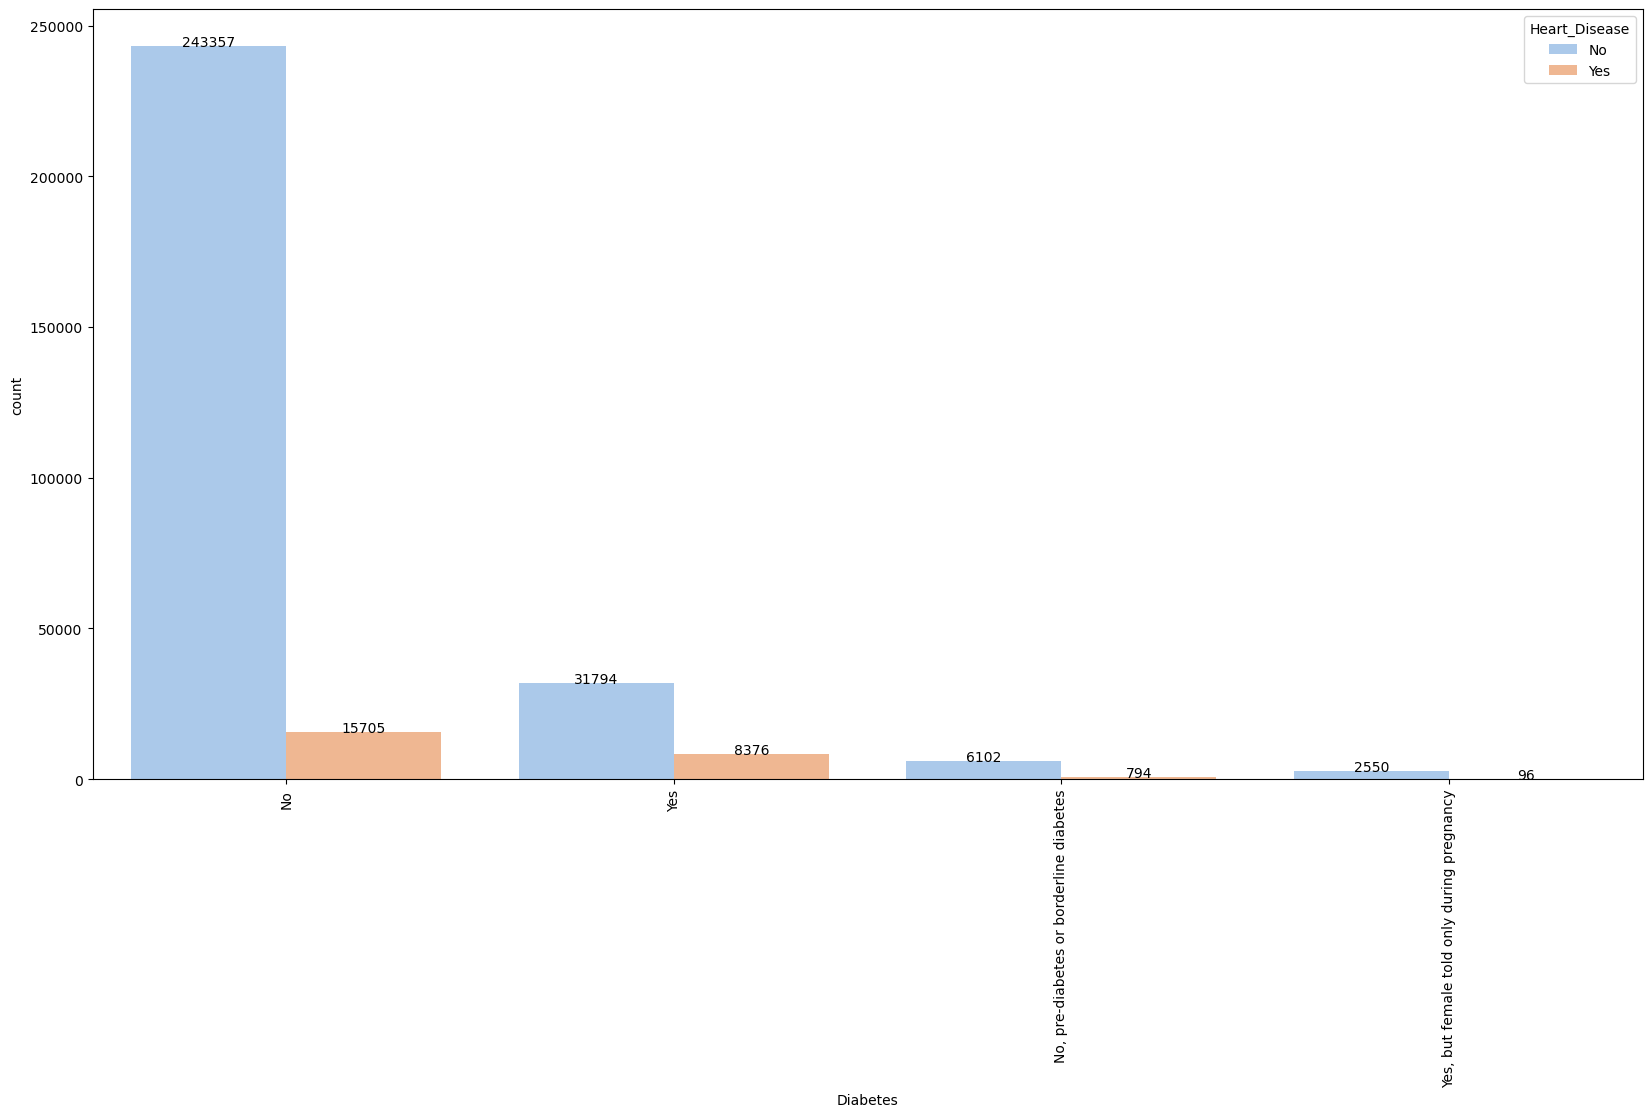

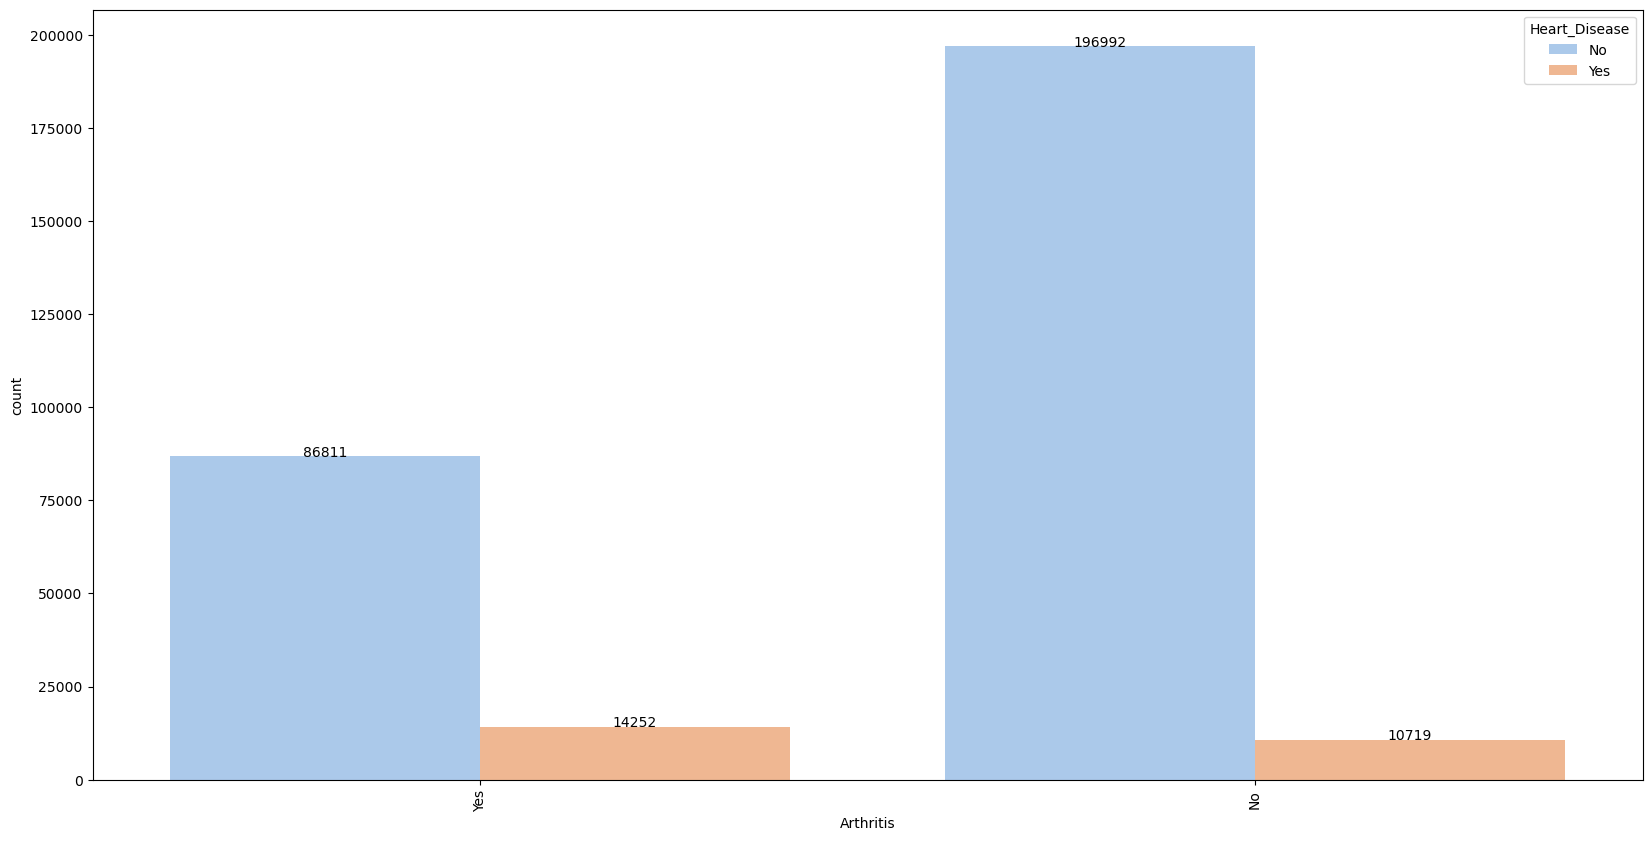

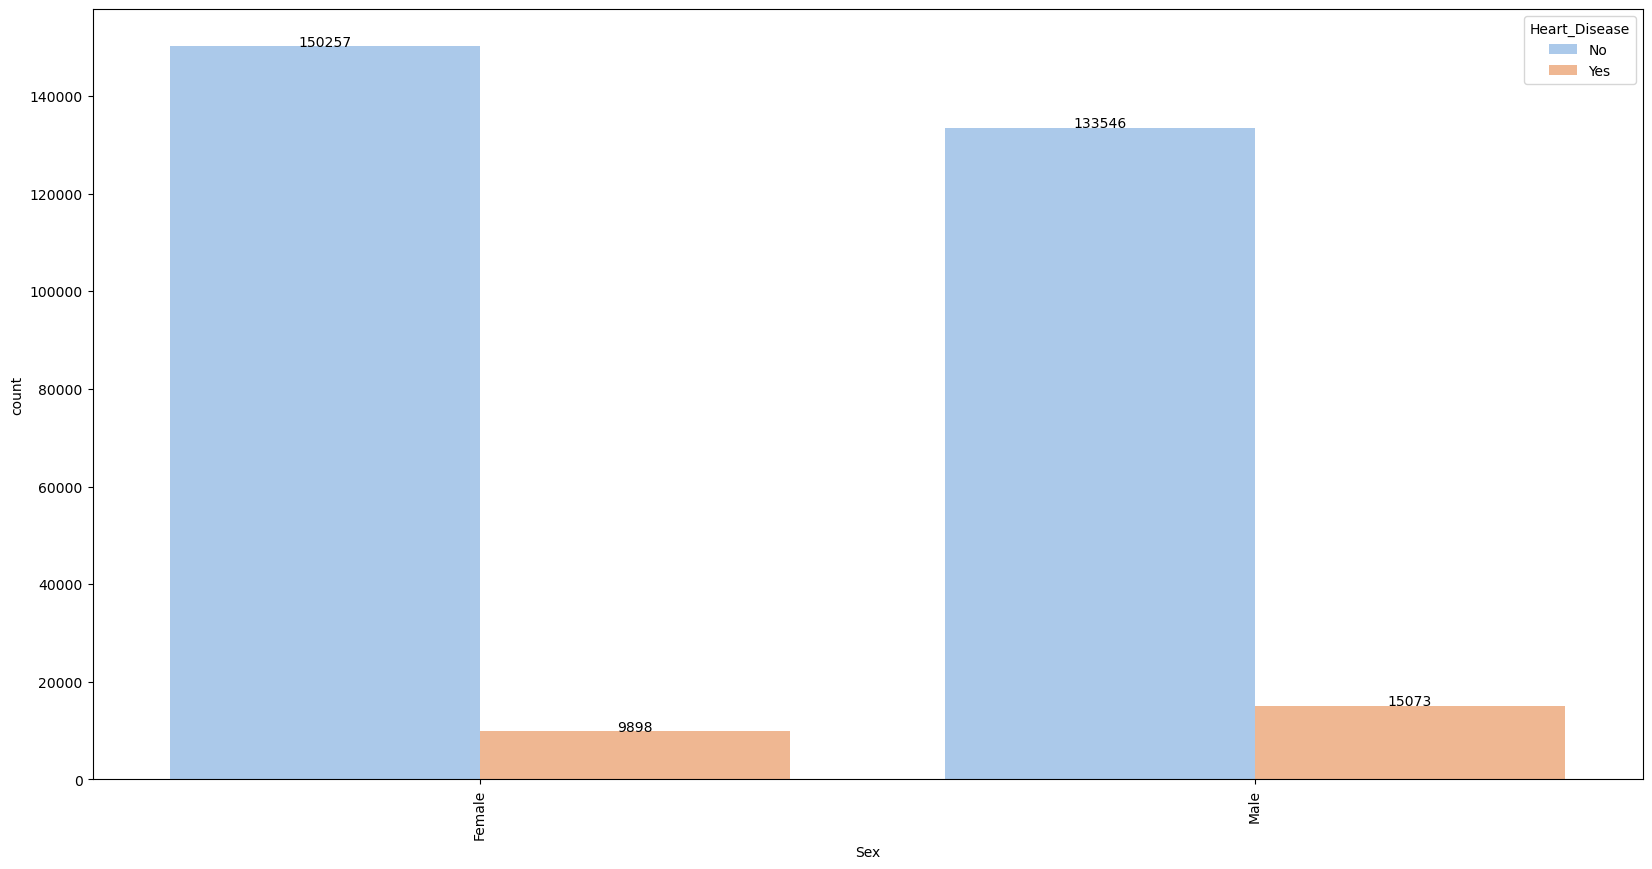

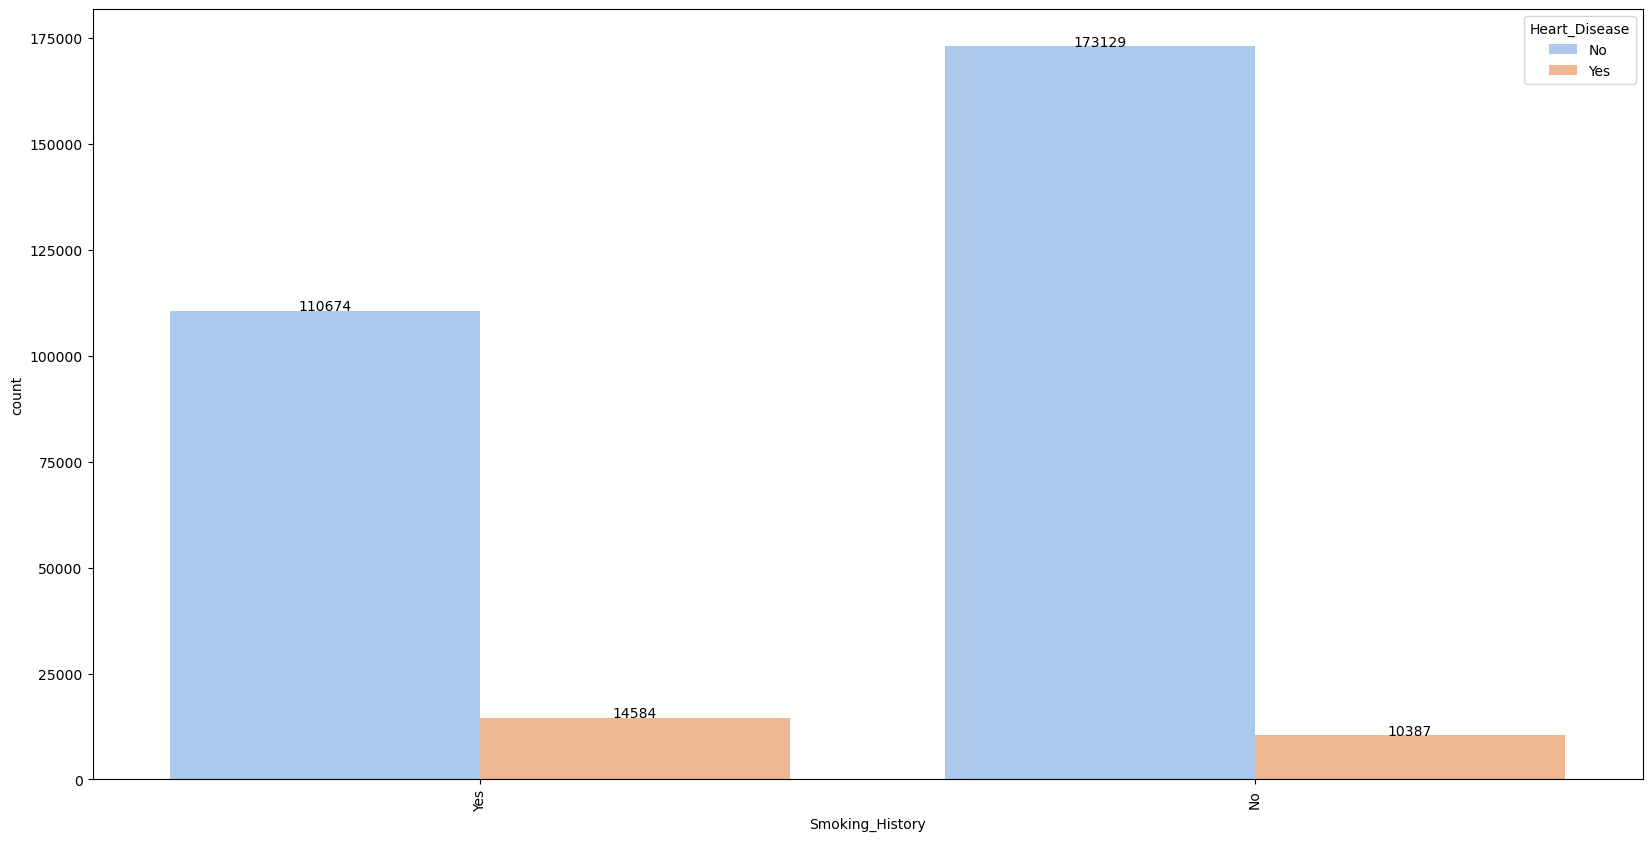

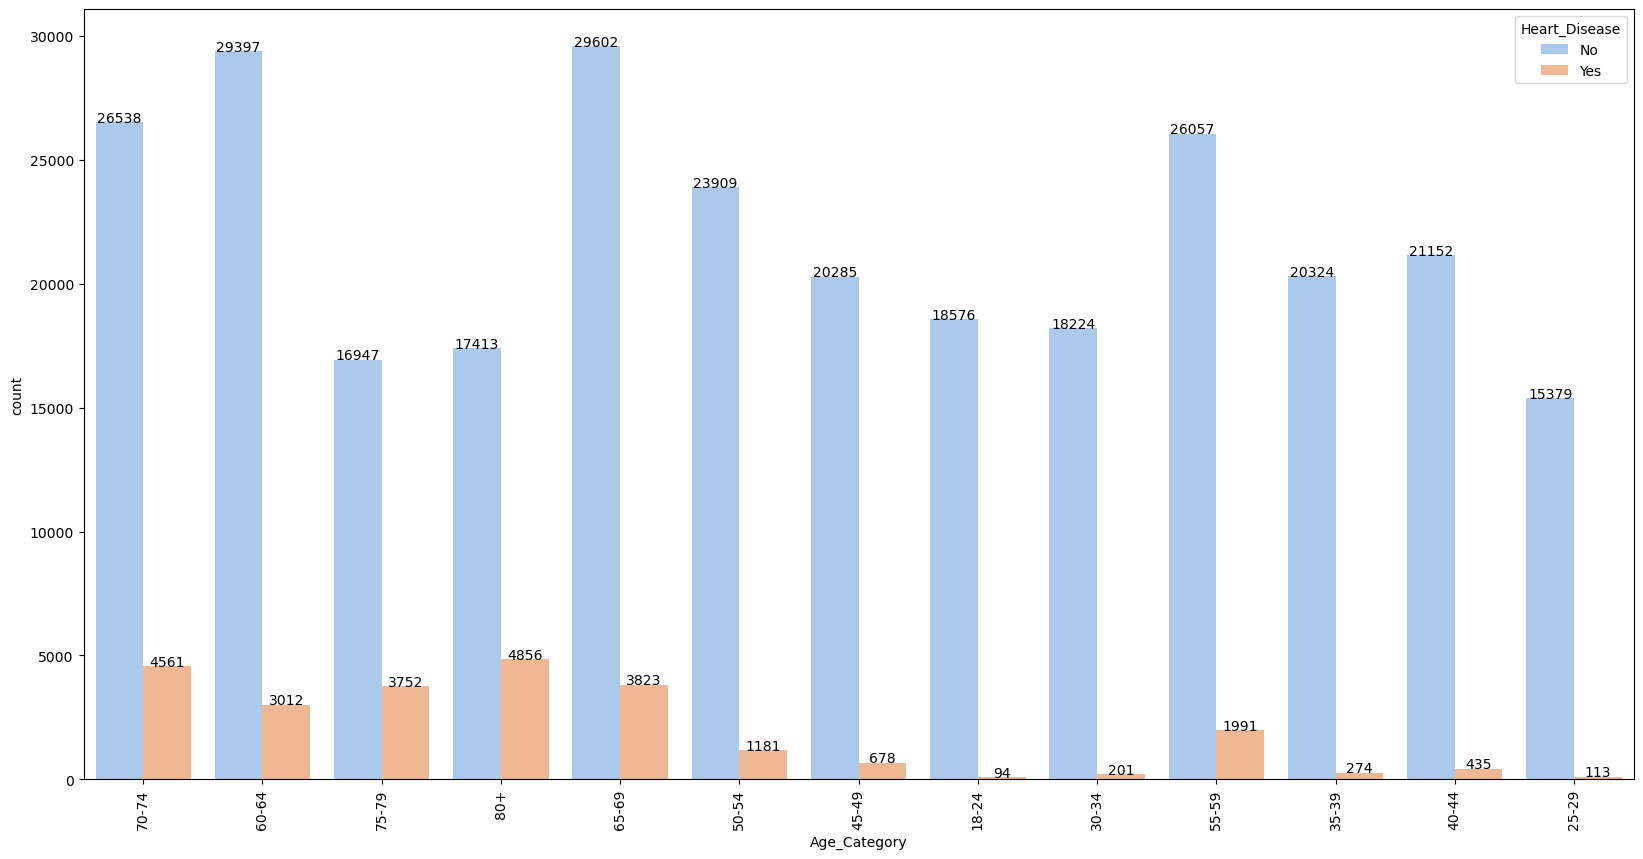

In [31]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = Prediction,hue='Heart_Disease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

## Outliers in Numerical Variables Depending on Several Factors

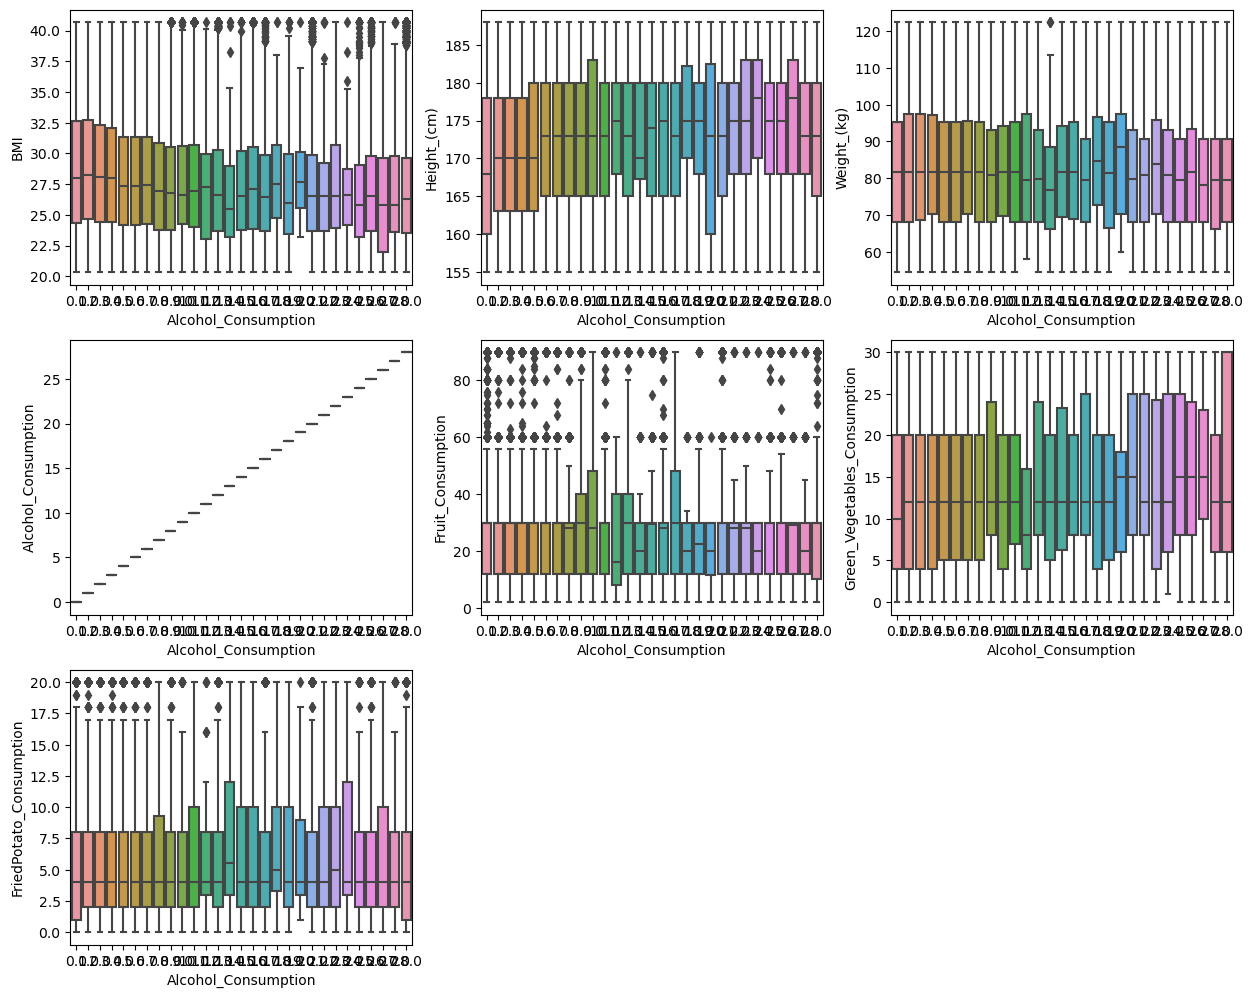

In [32]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=Prediction[feature], x = Prediction['Alcohol_Consumption'])
    i+=1

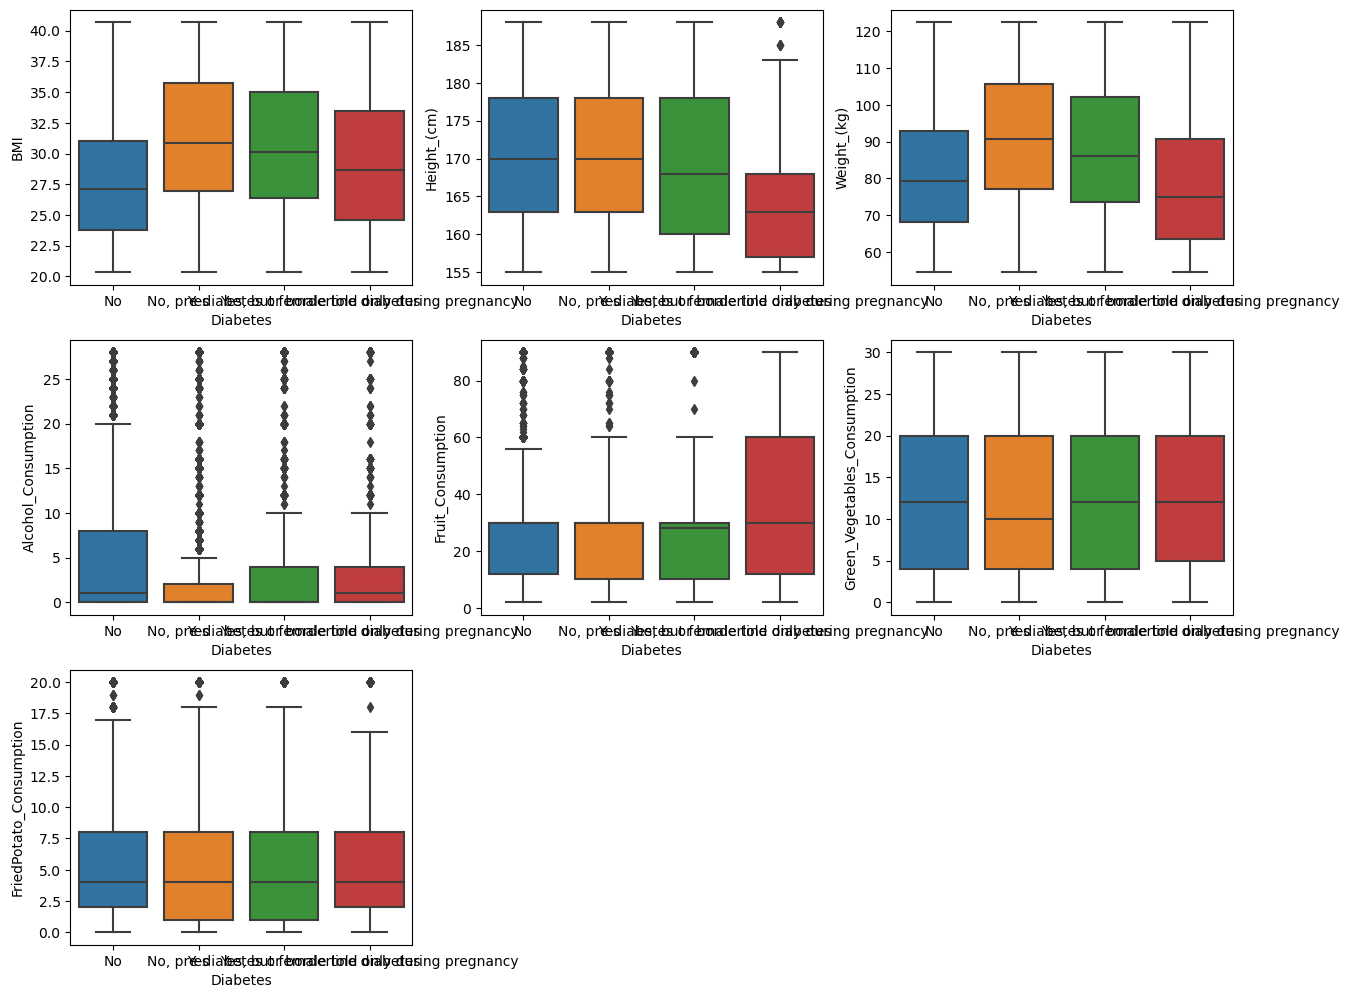

In [33]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=Prediction[feature], x = Prediction['Diabetes'])
    i+=1

# STATISTICAL TESTING

In [26]:
#Transform the dataset using the OrdinalEncoder method
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(Prediction[categorical_features])
Prediction[categorical_features] = enc.transform(Prediction[categorical_features])
print(Prediction.head())

   General_Health  Checkup  Exercise  Heart_Disease  Skin_Cancer  \
0             3.0      2.0       0.0            0.0          0.0   
1             4.0      4.0       0.0            1.0          0.0   
2             4.0      4.0       1.0            0.0          0.0   
3             3.0      4.0       1.0            1.0          0.0   
4             2.0      4.0       0.0            0.0          0.0   

   Other_Cancer  Depression  Diabetes  Arthritis  Sex  Age_Category  \
0           0.0         0.0       0.0        1.0  0.0          10.0   
1           0.0         0.0       2.0        0.0  0.0          10.0   
2           0.0         0.0       2.0        0.0  0.0           8.0   
3           0.0         0.0       2.0        0.0  1.0          11.0   
4           0.0         0.0       0.0        0.0  1.0          12.0   

   Height_(cm)  Weight_(kg)    BMI  Smoking_History  Alcohol_Consumption  \
0        155.0        54.43  20.34              1.0                  0.0   
1        165

In [27]:
# Using Shapiro-Wilk test to check for the normality of the distribution of numerical variables
from scipy.stats import shapiro
for feature in numeric_features:
	stat, p = shapiro(Prediction[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.670, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.854, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.879, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.838, p=0.000
Sample does not look Gaussian (reject H0)


In [28]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(Prediction[feature],Prediction['Heart_Disease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 5.70775202680712e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


In [27]:
correlation = Prediction.corr()
print(correlation['Heart_Disease'].sort_values(ascending = False),'\n')

Heart_Disease                   1.000000
Age_Category                    0.229027
Diabetes                        0.166218
Arthritis                       0.153891
Smoking_History                 0.107757
Other_Cancer                    0.092369
Skin_Cancer                     0.090835
Checkup                         0.083513
Sex                             0.072606
Weight_(kg)                     0.049656
BMI                             0.047031
Depression                      0.032494
Height_(cm)                     0.019392
FriedPotato_Consumption        -0.014517
Fruit_Consumption              -0.020161
General_Health                 -0.020640
Green_Vegetables_Consumption   -0.023490
Alcohol_Consumption            -0.037969
Exercise                       -0.096321
Name: Heart_Disease, dtype: float64 


Index(['Heart_Disease', 'Age_Category', 'Diabetes', 'Arthritis',
       'Smoking_History', 'Other_Cancer', 'Skin_Cancer', 'Checkup', 'Sex',
       'Weight_(kg)', 'BMI', 'Depression', 'Height_(cm)',
       'FriedPotato_Consumption', 'Fruit_Consumption', 'General_Health',
       'Green_Vegetables_Consumption', 'Alcohol_Consumption'],
      dtype='object')


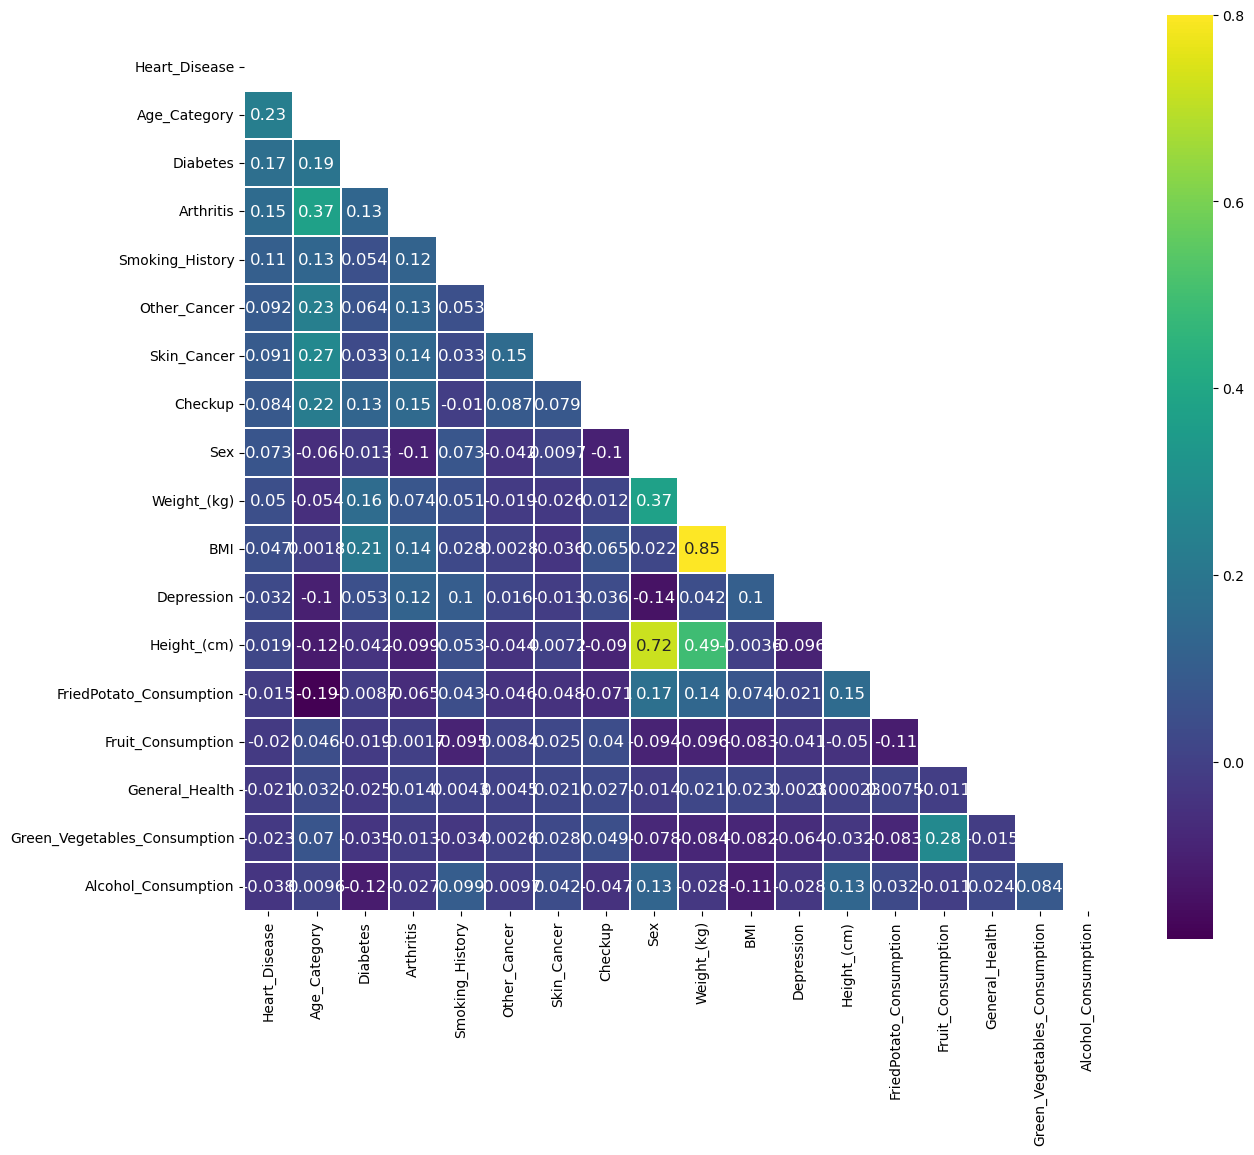

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

k = 18
cols = correlation.nlargest(k, 'Heart_Disease')['Heart_Disease'].index
print(cols)

cm = np.corrcoef(Prediction[cols].values.T)
mask = np.triu(np.ones_like(Prediction[cols].corr()))
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(cm, mask=mask, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis',
            linecolor="white", xticklabels=cols.values, annot_kws={'size': 12}, yticklabels=cols.values)
plt.show()

# MACHINE LEARNING

In [7]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
!pip install lightgbm
from lightgbm import LGBMClassifier
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [38]:
#y=Prediction['Heart_Disease']
#Prediction.drop('Heart_Disease',axis=1,inplace=True)

In [39]:
selected_features = ['Exercise', 'BMI', 'Diabetes', 'Sex', 'Age_Category', 'Weight_(kg)']

In [40]:
from sklearn.model_selection import train_test_split


y = Prediction['Heart_Disease']  

# Selecting the features
selected_features = ['Exercise', 'BMI', 'Diabetes', 'Sex', 'Age_Category', 'Weight_(kg)']

# Creating a subset of the DataFrame with only the selected features
X = Prediction[selected_features]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(247083, 6)
(61771, 6)
(247083,)
(61771,)


## Feature Selection

In [34]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier() 
xgb_model.fit(X_train, y_train)

# Print feature importances
importances = xgb_model.feature_importances_
features = X_train.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')


General_Health: 0.16210918128490448
Checkup: 0.027637407183647156
Exercise: 0.01758439466357231
Skin_Cancer: 0.01928871124982834
Other_Cancer: 0.021638575941324234
Depression: 0.025975951924920082
Diabetes: 0.14681187272071838
Arthritis: 0.07649163156747818
Sex: 0.13021129369735718
Age_Category: 0.20237934589385986
Height_(cm): 0.015756653621792793
Weight_(kg): 0.014595981687307358
BMI: 0.015649445354938507
Smoking_History: 0.059812262654304504
Alcohol_Consumption: 0.019892249256372452
Fruit_Consumption: 0.014778366312384605
Green_Vegetables_Consumption: 0.014673438854515553
FriedPotato_Consumption: 0.014713232405483723


In [35]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier()  
rf_model.fit(X_train, y_train)

# Print feature importances
importances = rf_model.feature_importances_
features = X_train.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')


General_Health: 0.05950048964812069
Checkup: 0.015879029792348294
Exercise: 0.01750626502994857
Skin_Cancer: 0.015599825510189036
Other_Cancer: 0.016712044936622823
Depression: 0.018313055271245934
Diabetes: 0.02965813996928556
Arthritis: 0.01864088094597953
Sex: 0.014947286151477172
Age_Category: 0.09114716210927595
Height_(cm): 0.08714987849475395
Weight_(kg): 0.12152047743301855
BMI: 0.14464283578918297
Smoking_History: 0.015377640342025595
Alcohol_Consumption: 0.05872894210809259
Fruit_Consumption: 0.0919444225722856
Green_Vegetables_Consumption: 0.09292709365309365
FriedPotato_Consumption: 0.08980453024305336


In [39]:
X_train, X_test, y_train, y_test=train_test_split(Prediction,y,test_size=0.2,random_state=42)


# Initialize and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Get coefficients
coefficients = logreg_model.coef_[0]
features = X_train.columns

# Print feature coefficients
for feature, coef in zip(features, coefficients):
    print(f'{feature}: {coef}')


General_Health: -0.16152474485265864
Checkup: 0.16909449471615515
Exercise: -0.1450977151133019
Skin_Cancer: 0.048335822361365716
Other_Cancer: 0.07451683293955792
Depression: 0.1561582444859213
Diabetes: 0.47478569190406744
Arthritis: 0.21876159690667285
Sex: 0.23100327361026454
Age_Category: 0.2888957756426358
Height_(cm): -0.03365986402726497
Weight_(kg): 0.04397408594663286
BMI: -0.11529690606316434
Smoking_History: 0.27846579541165556
Alcohol_Consumption: -0.015746314327954414
Fruit_Consumption: -0.002371799526951107
Green_Vegetables_Consumption: -0.006456807267313548
FriedPotato_Consumption: 0.012571543692468731


In [41]:
from sklearn.ensemble import ExtraTreesClassifier


et_model = ExtraTreesClassifier()  
et_model.fit(X_train, y_train)

# Print feature importances
importances = et_model.feature_importances_
features = X_train.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')

General_Health: 0.06617845029480653
Checkup: 0.019676186470805188
Exercise: 0.01489893927330021
Skin_Cancer: 0.014314552667370474
Other_Cancer: 0.014951209356016801
Depression: 0.018499572632575803
Diabetes: 0.03140512982868376
Arthritis: 0.018681315449631
Sex: 0.014339284843077721
Age_Category: 0.09812627827792002
Height_(cm): 0.09613328369116665
Weight_(kg): 0.10787950483454757
BMI: 0.11235796941754973
Smoking_History: 0.012829390169657649
Alcohol_Consumption: 0.07059649960671313
Fruit_Consumption: 0.0952441953229334
Green_Vegetables_Consumption: 0.09615998938529052
FriedPotato_Consumption: 0.09772824847795389


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already split your data into X_train and y_train
knn_model = KNeighborsClassifier()  
knn_model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(knn_model, X_train, y_train, n_repeats=30, random_state=42)

# Print feature importances
importances = perm_importance.importances_mean
features = X_train.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')

In [40]:
from sklearn.ensemble import ExtraTreesClassifier


et_model = ExtraTreesClassifier()  
et_model.fit(X_train, y_train)

# Print feature importances
importances = et_model.feature_importances_
features = X_train.columns
for feature, importance in zip(features, importances):
    print(f'{feature}: {importance}')


General_Health: 0.06664201311111212
Checkup: 0.019681331365401036
Exercise: 0.01439324906338061
Skin_Cancer: 0.013640974257073413
Other_Cancer: 0.014357367552579542
Depression: 0.018327999051151105
Diabetes: 0.031273899975884596
Arthritis: 0.018206986098839653
Sex: 0.014029304027318912
Age_Category: 0.09901851750612854
Height_(cm): 0.09594751871345164
Weight_(kg): 0.10812327189007682
BMI: 0.11286706565158706
Smoking_History: 0.013517987473142206
Alcohol_Consumption: 0.07041180734136573
Fruit_Consumption: 0.09530365645200593
Green_Vegetables_Consumption: 0.09610903690668256
FriedPotato_Consumption: 0.09814801356281853


In [34]:
!pip install imbalanced-learn

     -------------------------------------- 235.6/235.6 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [41]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier(), RandomForestClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


model: KNeighborsClassifier()
Accuracy_score: 0.9087435851775105
Precission_score: 0.2372742200328407
Recall_score: 0.057834700820492295
F1-score: 0.09300080450522928
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.918408314581276
Precission_score: 0.34306569343065696
Recall_score: 0.009405643386031618
F1-score: 0.018309310479158552
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missi

## Model Evaluation

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve
import matplotlib.pyplot as plt


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model: KNeighborsClassifier
Accuracy: 0.9087435851775105
Precision: 0.2372742200328407
Recall: 0.057834700820492295
F1 Score: 0.09300080450522928
ROC AUC Score: 0.6519917075831154
Confusion Matrix:
[[55845   929]
 [ 4708   289]]
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


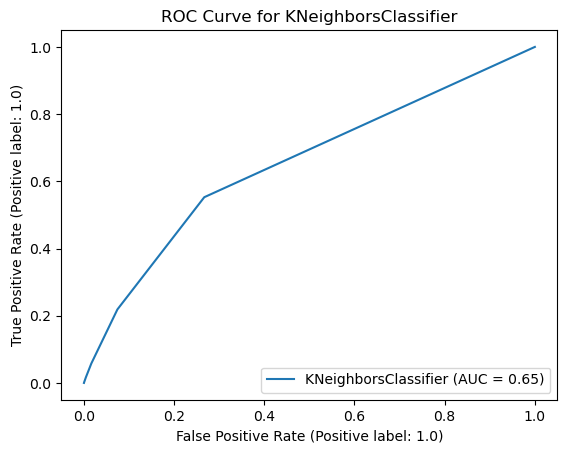

Model: LogisticRegression
Accuracy: 0.918408314581276
Precision: 0.34306569343065696
Recall: 0.009405643386031618
F1 Score: 0.018309310479158552
ROC AUC Score: 0.7909560034819637
Confusion Matrix:
[[56684    90]
 [ 4950    47]]
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


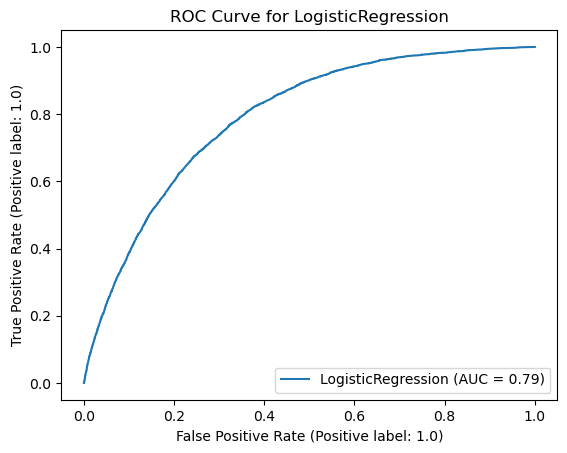

Model: XGBClassifier
Accuracy: 0.9189101682019071
Precision: 0.42105263157894735
Recall: 0.00640384230538323
F1 Score: 0.012615809185886064
ROC AUC Score: 0.7882419168625211
Confusion Matrix:
[[56730    44]
 [ 4965    32]]
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


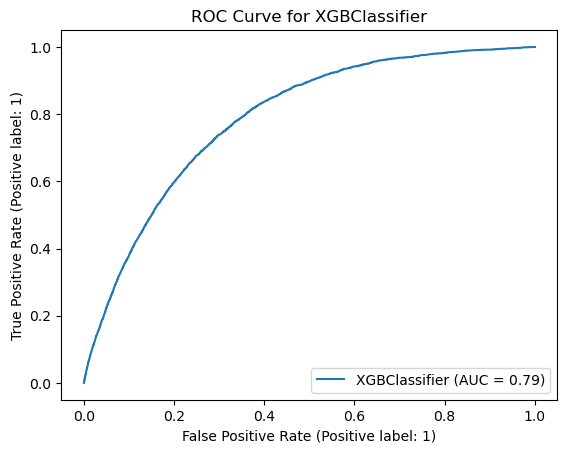

Model: ExtraTreesClassifier
Accuracy: 0.9087112075245666
Precision: 0.2432
Recall: 0.060836501901140684
F1 Score: 0.09732671682407557
ROC AUC Score: 0.6645885583275144
Confusion Matrix:
[[55828   946]
 [ 4693   304]]
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


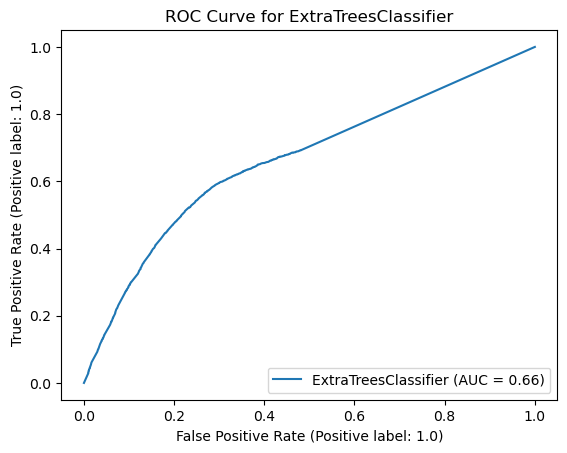

Model: RandomForestClassifier
Accuracy: 0.907399912580337
Precision: 0.24270462633451959
Recall: 0.06824094456674004
F1 Score: 0.10652920962199312
ROC AUC Score: 0.7072129581338475
Confusion Matrix:
[[55710  1064]
 [ 4656   341]]
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


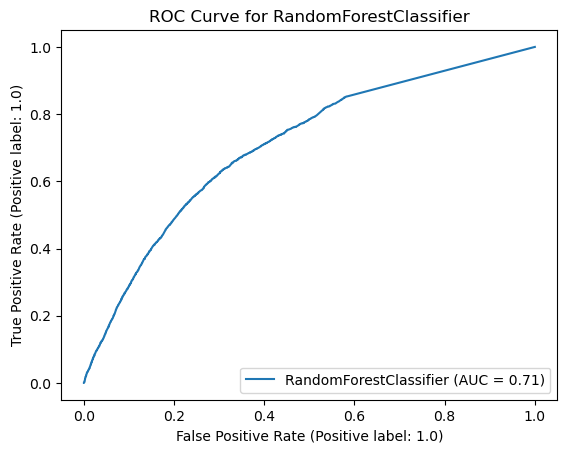

In [44]:
for m in models:
    # Make predictions
    y_pred = m.predict(X_test)
    y_prob = m.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Printing metrics
    print(f'Model: {m.__class__.__name__}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC Score: {roc_auc}')
    print('Confusion Matrix:')
    print(cm)
    print('-'*30, '\n')

    # ROC Curve
    plot_roc_curve(m, X_test, y_test)
    plt.title(f'ROC Curve for {m.__class__.__name__}')
    plt.show()


In [ ]:
# Define a stratified k-fold cross-validator
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# List of models to train
models = [
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Adjust for XGBClassifier specifics
    ExtraTreesClassifier(random_state=42),
    RandomForestClassifier(random_state=42)
]

# Perform cross-validation and store results
model_scores = {}

for model in models:
    # Get the model name
    model_name = model.__class__.__name__
    # Perform cross-validation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # Store the results
    model_scores[model_name] = scores
    print(f'{model_name}: Mean Accuracy: {np.mean(scores):.3f} (Standard Deviation: {np.std(scores):.3f})')

# Now `model_scores` holds the cross-validation results for each model

In [ ]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import numpy as np


# Perform cross-validation and store results
model_scores = {}

for model in models:
    # Get the model name
    model_name = model.__class__.__name__
    # Perform cross-validation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # Store the results
    model_scores[model_name] = scores
    print(f'{model_name}: Mean Accuracy: {np.mean(scores):.3f} (Standard Deviation: {np.std(scores):.3f})')



## Tuning KNN

In [47]:
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    print(f"Accuracy with {i} no. of neighbors: {knn.fit(X_train, y_train).score(X_test,y_test)}%")

Accuracy with 1 no. of neighbors: 0.8651769087523278%
Accuracy with 2 no. of neighbors: 0.9113432110760262%
Accuracy with 3 no. of neighbors: 0.9000404825520201%
Accuracy with 4 no. of neighbors: 0.9140474455509675%
Accuracy with 5 no. of neighbors: 0.9099506112865355%
Accuracy with 6 no. of neighbors: 0.9157800987774269%
Accuracy with 7 no. of neighbors: 0.9141446036758157%
Accuracy with 8 no. of neighbors: 0.9170107683588373%
Accuracy with 9 no. of neighbors: 0.9160229940895475%
Accuracy with 10 no. of neighbors: 0.9171888915877257%
Accuracy with 11 no. of neighbors: 0.916865031171565%
Accuracy with 12 no. of neighbors: 0.9173670148166141%
Accuracy with 13 no. of neighbors: 0.9172050846085337%
Accuracy with 14 no. of neighbors: 0.9175775240871185%
Accuracy with 15 no. of neighbors: 0.9175127520038864%
Accuracy with 16 no. of neighbors: 0.9176422961703505%
Accuracy with 17 no. of neighbors: 0.9175775240871185%
Accuracy with 18 no. of neighbors: 0.9177070682535827%
Accuracy with 19 no.

In [48]:
np.random.seed(42)
from sklearn.neighbors import KNeighborsClassifier
Knn_clf=  KNeighborsClassifier(n_neighbors=20)
Knn_clf.fit(X_train,y_train)
Knn_y_pred=Knn_clf.predict(X_test)
Knn_score=Knn_clf.score(X_test,y_test)

print(f'model: KNeighborsClassifier')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'Precission_score: {precision_score(y_test,y_pred)}')
print(f'Recall_score: {recall_score(y_test,y_pred)}')
print(f'F1-score: {f1_score(y_test,y_pred)}')
print('-'*30, '\n')

model: KNeighborsClassifier
Accuracy_score: 0.9176584891911587
Precission_score: 0.4880546075085324
Recall_score: 0.028160693186293818
F1-score: 0.053248929435859245
------------------------------ 


## Random Forest Tuning

In [56]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
for i in range(1,40,1):
  print(f"With {i*10} estimators:")
  clf2=RandomForestClassifier(n_estimators=i*10,max_depth=i,random_state=i).fit(X_train,y_train)
  print(f"Accuracy: {clf2.score(X_test,y_test)*100:2f}%")

With 10 estimators:
Accuracy: 91.910443%
With 20 estimators:
Accuracy: 91.910443%
With 30 estimators:
Accuracy: 91.910443%
With 40 estimators:
Accuracy: 91.910443%
With 50 estimators:
Accuracy: 91.910443%
With 60 estimators:
Accuracy: 91.910443%
With 70 estimators:
Accuracy: 91.910443%
With 80 estimators:
Accuracy: 91.910443%
With 90 estimators:
Accuracy: 91.908825%
With 100 estimators:
Accuracy: 91.903968%
With 110 estimators:
Accuracy: 91.900730%
With 120 estimators:
Accuracy: 91.894255%
With 130 estimators:
Accuracy: 91.882922%
With 140 estimators:
Accuracy: 91.869971%
With 150 estimators:
Accuracy: 91.780933%
With 160 estimators:
Accuracy: 91.687038%
With 170 estimators:
Accuracy: 91.557527%
With 180 estimators:
Accuracy: 91.473345%
With 190 estimators:
Accuracy: 91.309838%
With 200 estimators:
Accuracy: 91.151187%
With 210 estimators:
Accuracy: 91.047579%
With 220 estimators:
Accuracy: 90.948827%
With 230 estimators:
Accuracy: 90.937495%
With 240 estimators:
Accuracy: 90.903498%
W

In [57]:
from sklearn.ensemble import RandomForestClassifier
RF_clf2=RandomForestClassifier(n_estimators=390,max_depth=3,random_state=3)
RF_clf2.fit(X_train,y_train)
RF2_acc_score=RF_clf2.score(X_test,y_test)
RF2_y_pred=RF_clf2.predict(X_test)
#print(RF2_acc_score)

print(f'model: RandomForestClassifier')
print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
print(f'Precission_score: {precision_score(y_test,y_pred)}')
print(f'Recall_score: {recall_score(y_test,y_pred)}')
print(f'F1-score: {f1_score(y_test,y_pred)}')
print('-'*390, '\n')

model: RandomForestClassifier
Accuracy_score: 0.9191044341195707
Precission_score: 0.0
Recall_score: 0.0
F1-score: 0.0
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
y_prob = rf_clf.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_prob > 0.3).astype(int)  # Adjust the threshold as needed

# Calculate metrics with the adjusted predictions
print(f'Precision_score: {precision_score(y_test, y_pred_adjusted)}')
print(f'Recall_score: {recall_score(y_test, y_pred_adjusted)}')


Precision_score: 0.0
Recall_score: 0.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
class_weights = {0: 1, 1: 1}  # Equal weights

In [66]:
from sklearn.utils.class_weight import compute_sample_weight

# Calculate sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)



In [67]:
rf_clf = RandomForestClassifier(n_estimators=390, max_depth=3, random_state=3)
rf_clf.fit(X_train, y_train, sample_weight=sample_weights)


RandomForestClassifier(max_depth=3, n_estimators=390, random_state=3)

## Hyper Parameter Tuning KNeighboursClassifier Using GridSearchCV

In [ ]:
knn_grid={'n_neighbors': np.arange(1,30,1),
          'leaf_size': np.arange(1,50,1)}

gs_knn=GridSearchCV(KNeighborsClassifier(),param_grid=knn_grid,cv=5,verbose=True)

gs_knn.fit(X_train, y_train)

gs_knn.best_params_

print(f"Accuracy_score:{gs_knn.score(X_test,y_test)*100}%")

Fitting 5 folds for each of 1421 candidates, totalling 7105 fits


In [ ]:
!pip install joblib

In [ ]:
import joblib

In [69]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib


# Create individual models
knn_clf = KNeighborsClassifier(n_neighbors=20)
rf_clf = RandomForestClassifier(n_estimators=390, max_depth=3, random_state=3)
xgb_clf = XGBClassifier()
et_clf = ExtraTreesClassifier()
lr_clf = LogisticRegression()

# Fit individual models
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)
et_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)

# Make predictions on the test set
knn_y_pred = knn_clf.predict(X_test)
rf_y_pred = rf_clf.predict(X_test)
xgb_y_pred = xgb_clf.predict(X_test)
et_y_pred = et_clf.predict(X_test)
lr_y_pred = lr_clf.predict(X_test)

# Print individual model scores
models = [knn_clf, lr_clf, xgb_clf, et_clf, rf_clf]

for model, y_pred in zip(models, [knn_y_pred, lr_y_pred, xgb_y_pred, et_y_pred, rf_y_pred]):
    print(f'model: {str(model)}')
    print(f'Accuracy_score: {accuracy_score(y_test, y_pred)}')
    print(f'Precision_score: {precision_score(y_test, y_pred)}')
    print(f'Recall_score: {recall_score(y_test, y_pred)}')
    print(f'F1-score: {f1_score(y_test, y_pred)}')
    print('-' * 30, '\n')

# Create an ensemble model
ensemble_model = VotingClassifier(estimators=[('KNN', knn_clf), ('LR', lr_clf), ('XGB', xgb_clf),
                                               ('ET', et_clf), ('RF', rf_clf)], voting='hard')

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions using the ensemble model
ensemble_y_pred = ensemble_model.predict(X_test)

# Print ensemble model scores
print(f'model: Ensemble Model')
print(f'Accuracy_score: {accuracy_score(y_test, ensemble_y_pred)}')
print(f'Precision_score: {precision_score(y_test, ensemble_y_pred)}')
print(f'Recall_score: {recall_score(y_test, ensemble_y_pred)}')
print(f'F1-score: {f1_score(y_test, ensemble_y_pred)}')
print('-' * 30, '\n')

# Save the ensemble model
joblib.dump(ensemble_model, 'ensemble_model.pkl')

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


model: KNeighborsClassifier(n_neighbors=20)
Accuracy_score: 0.9187806575901313
Precision_score: 0.35714285714285715
Recall_score: 0.005003001801080648
F1-score: 0.009867771857114663
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.918408314581276
Precision_score: 0.34306569343065696
Recall_score: 0.009405643386031618
F1-score: 0.018309310479158552
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weig

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision_score: 0.0
Recall_score: 0.0
F1-score: 0.0
------------------------------ 


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


model: Ensemble Model
Accuracy_score: 0.9190882452930987
Precision_score: 0.46153846153846156
Recall_score: 0.0012007204322593557
F1-score: 0.0023952095808383233
------------------------------ 


['ensemble_model.pkl']

In [54]:
LR_score = 0.918
RF2_acc_score =  0.919
Knn_score = 0.918
et_score = 0.908
XGB_score = 0.918
Ensemble_Model_score =0.919

model_comp = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbour', 'ExtraTreeslassifier', 'Extreme Gradient Boost', 'Ensemble_Model'],
    'Accuracy': [LR_score * 100, RF2_acc_score * 100, Knn_score * 100, et_score * 100, XGB_score * 100, Ensemble_Model_score * 100]
})

# Display the DataFrame
print(model_comp)


                    Model  Accuracy
0     Logistic Regression      91.8
1           Random Forest      91.9
2     K-Nearest Neighbour      91.8
3     ExtraTreeslassifier      90.8
4  Extreme Gradient Boost      91.8
5          Ensemble_Model      91.9


In [2]:
import streamlit as st
import pandas as pd
import numpy as np

def main():
    st.sidebar.title("Navigation")
    user_choice = st.sidebar.radio('Go to', ('Home', 'Heart Disease Prediction'))

    if user_choice == 'Home':
        st.title('Welcome to the Heart Disease Prediction System')
        st.write('This System uses machine learning to predict heart disease.')

    elif user_choice == 'Heart Disease Prediction':
        st.title('Heart Disease Prediction')

        # Here you can add your input fields and prediction logic

if __name__ == "__main__":
    main()
